<a href="https://colab.research.google.com/github/asfanjamil/regression-project-for-seoul-bike/blob/main/regression_project_for_seoul_bike_rented.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Seoul Bike Sharing Demand Prediction



# New Section

##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.
the data having the ***8760*** rows and ***14*** variables.
where we Predict how atmospheric conditions affect the number of bikes rented.
A Data mining technique is employed for overcoming the hurdles for the prediction of hourly rental bike demand



# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from datetime import datetime
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset=pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv',encoding=('ISO-8859-1'))

### Dataset First View

In [4]:
# Dataset First Look
dataset.head(5)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count 
dataset.shape


(8760, 14)

In [6]:
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

### Dataset Information

In [7]:
# Dataset Info 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count 
len(dataset[dataset.duplicated()])

0

**In the above data after count the  duplicate value we came to know that there are no  duplicate value present.**

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count 
dataset.isnull().sum()
dataset.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

### **As we can see above there are no missing value presents thankfully**

In [ ]:
# Visualizing the missing values 

### What did you know about your dataset?

### **This Dataset contains 8760 lines and 14 columns.**

### In a day we have 24 hours and we have 365 days a year so 365 multiplied by 24 = 8760, which represents the number of line in the dataset 

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns 
dataset.columns


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [11]:
# Dataset Describe 
dataset.describe(include="all").T

count unique         top  freq         mean  \
Date                         8760    365  01/12/2017    24          NaN   
Rented Bike Count          8760.0    NaN         NaN   NaN   704.602055   
Hour                       8760.0    NaN         NaN   NaN         11.5   
Temperature(°C)            8760.0    NaN         NaN   NaN    12.882922   
Humidity(%)                8760.0    NaN         NaN   NaN    58.226256   
Wind speed (m/s)           8760.0    NaN         NaN   NaN     1.724909   
Visibility (10m)           8760.0    NaN         NaN   NaN  1436.825799   
Dew point temperature(°C)  8760.0    NaN         NaN   NaN     4.073813   
Solar Radiation (MJ/m2)    8760.0    NaN         NaN   NaN     0.569111   
Rainfall(mm)               8760.0    NaN         NaN   NaN     0.148687   
Snowfall (cm)              8760.0    NaN         NaN   NaN     0.075068   
Seasons                      8760      4      Spring  2208          NaN   
Holiday                      8760      2  No Holiday  8328          NaN   
Functioning Day              8760      2         Yes  8465          NaN   

                                  std   min    25%     50%      75%     max  
Date                              NaN   NaN    NaN     NaN      NaN     NaN  
Rented Bike Count          644.997468   0.0  191.0   504.5  1065.25  3556.0  
Hour                         6.922582   0.0   5.75    11.5    17.25    23.0  
Temperature(°C)             11.944825 -17.8    3.5    13.7     22.5    39.4  
Humidity(%)                 20.362413   0.0   42.0    57.0     74.0    98.0  
Wind speed (m/s)               1.0363   0.0    0.9     1.5      2.3     7.4  
Visibility (10m)           608.298712  27.0  940.0  1698.0   2000.0  2000.0  
Dew point temperature(°C)   13.060369 -30.6   -4.7     5.1     14.8    27.2  
Solar Radiation (MJ/m2)      0.868746   0.0    0.0    0.01     0.93    3.52  
Rainfall(mm)                 1.128193   0.0    0.0     0.0      0.0    35.0  
Snowfall (cm)                0.436746   0.0    0.0     0.0      0.0     8.8  
Seasons                           NaN   NaN    NaN     NaN      NaN     NaN  
Holiday                           NaN   NaN    NaN     NaN      NaN     NaN  
Functioning Day                   NaN   NaN    NaN     NaN      NaN     NaN

### Variables Description 

# **Breakdown of Our Features:**

***Date*** : The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type : str, we need to convert into datetime format.

***Rented Bike Count*** : Number of rented bikes per hour which our dependent variable and we need to predict that, type : int

***Hour***: The hour of the day, starting from 0-23 it's in a digital time format, type : int, we need to convert it into category data type.

***Temperature(°C):*** Temperature in Celsius, type : Float

***Humidity(%):*** Humidity in the air in %, type : int

***Wind speed (m/s) :*** Speed of the wind in m/s, type : Float

***Visibility (10m):*** Visibility in m, type : int

***Dew point temperature(°C):*** Temperature at the beggining of the day, type : Float

***Solar Radiation (MJ/m2):*** Sun contribution, type : Float

***Rainfall(mm):*** Amount of raining in mm, type : Float

***Snowfall (cm)***: Amount of snowing in cm, type : Float

***Seasons:*** *Season of the year, type : str, there are only 4 season's in data *.

***Holiday:*** If the day is holiday period or not, type: str

***Functioning Day:*** If the day is a Functioning Day or not, type : str

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
print(dataset.apply(lambda x: x.unique()))

Date                         [01/12/2017, 02/12/2017, 03/12/2017, 04/12/201...
Rented Bike Count            [254, 204, 173, 107, 78, 100, 181, 460, 930, 4...
Hour                         [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
Temperature(°C)              [-5.2, -5.5, -6.0, -6.2, -6.4, -6.6, -7.4, -7....
Humidity(%)                  [37, 38, 39, 40, 36, 35, 27, 24, 21, 23, 25, 2...
Wind speed (m/s)             [2.2, 0.8, 1.0, 0.9, 2.3, 1.5, 1.3, 1.1, 0.5, ...
Visibility (10m)             [2000, 1928, 1996, 1936, 793, 1913, 1687, 1380...
Dew point temperature(°C)    [-17.6, -17.7, -18.6, -18.7, -19.5, -19.3, -19...
Solar Radiation (MJ/m2)      [0.0, 0.01, 0.23, 0.65, 0.94, 1.11, 1.16, 1.01...
Rainfall(mm)                 [0.0, 0.5, 1.0, 2.5, 0.1, 0.2, 0.3, 0.7, 1.6, ...
Snowfall (cm)                [0.0, 0.1, 0.3, 0.4, 0.2, 1.0, 0.9, 0.8, 0.7, ...
Seasons                                       [Winter, Spring, Summer, Autumn]
Holiday                                             

## 3. ***Data Wrangling***

### Data Wrangling Code

## **Breaking date column**

In [13]:
# Write your code to make your dataset analysis ready. 
dataset["Date"] = pd.to_datetime(dataset["Date"] )
dataset["Day"] = dataset["Date"].dt.day
dataset["Month"] = dataset["Date"].dt.month
dataset["Year"] = dataset["Date"].dt.year
dataset["weekday"] = dataset["Date"].dt.day_name()


So we convert the "date" column into 3 different column i.e "year","month","day".

The "year" column in our data set is basically contain the 2 unique number contains the details of from 2017 december to 2018 november 

. month column contains the month 

The other column "day", it contains the details about the each day of the month.

.weekdays contains all the 7 days

**after breaking the date column , we dont need this column so we drop this column**

In [14]:
dataset.drop("Date", axis=1, inplace=True)

In [15]:
# now checking again all the columns
dataset.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  Day  \
0           0.0            0.0  Winter  No Holiday             Yes   12   
1           0.0            0.0  Winter  No Holiday             Yes   12   
2           0.0            0.0  Winter  No Holiday             Yes   12   
3           0.0            0.0  Winter  No Holiday             Yes   12   
4           0.0            0.0  Winter  No Holiday             Yes   12   

   Month  Year   weekday  
0      1  2017  Thursday  
1      1  2017  Thursday  
2      1  2017  Thursday  
3      1  2017  Thursday  
4      1  2017  Thursday

In [ ]:
dataset.nunique()

Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
Day                            31
Month                          12
Year                            2
weekday                         7
dtype: int64

In [ ]:
#Data Preparation
dataset.Seasons.value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

**we can see there is four unique values for column seasons** . **now change the data type from numerical**

In [ ]:
numeric_feature = dataset.describe().columns

In [ ]:
#dont change original data so i copy the to another dataset that is dataset_pr
dataset_pr = dataset.copy()

In [ ]:
### Data encoding
#label encoding
encoders_nums = {"Seasons":{"Spring":1,"Summer":2, "Autumn":3, "Winter":4},
                 "Holiday":{"Holiday":1,"No Holiday":0},
                 "Functioning Day ":     {"Yes": 1, "No": 0},
                 "weekday":{"Sunday": 1, "Wednesday": 4, "Tuesday ": 3, "Thursday": 5,
                                  "Saturday ": 7, "Friday": 6, "Monday":2 }
                 }

### **so basicaly , in the above i am changing all categorical variables into numeric variables for better visualization**

In [ ]:
dataset_pr = dataset_pr.replace(encoders_nums)

**A one hot encoding allows the representation of categorical data to be more expressive. Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical.**

In [ ]:
# Dummification / ONE HOT ENCODING
dataset_pr = pd.get_dummies(dataset_pr, columns=["Functioning Day"])

In [ ]:
dataset_pr.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm)  Seasons  Holiday  Day  Month  Year weekday  \
0           0.0            0.0        4        0   12      1  2017       5   
1           0.0            0.0        4        0   12      1  2017       5   
2           0.0            0.0        4        0   12      1  2017       5   
3           0.0            0.0        4        0   12      1  2017       5   
4           0.0            0.0        4        0   12      1  2017       5   

   Functioning Day_No  Functioning Day_Yes  
0                   0                    1  
1                   0                    1  
2                   0                    1  
3                   0                    1  
4                   0                    1

In [ ]:
dataset_pr.shape

(8760, 18)

In [ ]:
dataset_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   int64  
 11  Holiday                    8760 non-null   int64  
 12  Day                        8760 non-null   int64  
 13  Month                      8760 non-null   int64

**so here succesfully changed the datatypes of all categorical variable**

In [ ]:
dataset_pr.describe(include="all").T

count  unique  top    freq         mean  \
Rented Bike Count          8760.0     NaN  NaN     NaN   704.602055   
Hour                       8760.0     NaN  NaN     NaN    11.500000   
Temperature(°C)            8760.0     NaN  NaN     NaN    12.882922   
Humidity(%)                8760.0     NaN  NaN     NaN    58.226256   
Wind speed (m/s)           8760.0     NaN  NaN     NaN     1.724909   
Visibility (10m)           8760.0     NaN  NaN     NaN  1436.825799   
Dew point temperature(°C)  8760.0     NaN  NaN     NaN     4.073813   
Solar Radiation (MJ/m2)    8760.0     NaN  NaN     NaN     0.569111   
Rainfall(mm)               8760.0     NaN  NaN     NaN     0.148687   
Snowfall (cm)              8760.0     NaN  NaN     NaN     0.075068   
Seasons                    8760.0     NaN  NaN     NaN     2.490411   
Holiday                    8760.0     NaN  NaN     NaN     0.049315   
Day                        8760.0     NaN  NaN     NaN    15.720548   
Month                      8760.0     NaN  NaN     NaN     6.526027   
Year                       8760.0     NaN  NaN     NaN  2017.915068   
weekday                    8760.0     7.0  1.0  1296.0          NaN   
Functioning Day_No         8760.0     NaN  NaN     NaN     0.033676   
Functioning Day_Yes        8760.0     NaN  NaN     NaN     0.966324   

                                  std     min      25%      50%      75%  \
Rented Bike Count          644.997468     0.0   191.00   504.50  1065.25   
Hour                         6.922582     0.0     5.75    11.50    17.25   
Temperature(°C)             11.944825   -17.8     3.50    13.70    22.50   
Humidity(%)                 20.362413     0.0    42.00    57.00    74.00   
Wind speed (m/s)             1.036300     0.0     0.90     1.50     2.30   
Visibility (10m)           608.298712    27.0   940.00  1698.00  2000.00   
Dew point temperature(°C)   13.060369   -30.6    -4.70     5.10    14.80   
Solar Radiation (MJ/m2)      0.868746     0.0     0.00     0.01     0.93   
Rainfall(mm)                 1.128193     0.0     0.00     0.00     0.00   
Snowfall (cm)                0.436746     0.0     0.00     0.00     0.00   
Seasons                      1.116831     1.0     1.00     2.00     3.00   
Holiday                      0.216537     0.0     0.00     0.00     0.00   
Day                          8.796749     1.0     8.00    16.00    23.00   
Month                        3.448048     1.0     4.00     7.00    10.00   
Year                         0.278796  2017.0  2018.00  2018.00  2018.00   
weekday                           NaN     NaN      NaN      NaN      NaN   
Functioning Day_No           0.180404     0.0     0.00     0.00     0.00   
Functioning Day_Yes          0.180404     0.0     1.00     1.00     1.00   

                               max  
Rented Bike Count          3556.00  
Hour                         23.00  
Temperature(°C)              39.40  
Humidity(%)                  98.00  
Wind speed (m/s)              7.40  
Visibility (10m)           2000.00  
Dew point temperature(°C)    27.20  
Solar Radiation (MJ/m2)       3.52  
Rainfall(mm)                 35.00  
Snowfall (cm)                 8.80  
Seasons                       4.00  
Holiday                       1.00  
Day                          31.00  
Month                        12.00  
Year                       2018.00  
weekday                        NaN  
Functioning Day_No            1.00  
Functioning Day_Yes           1.00

### What all manipulations have you done and insights you found?

### **As "Functioning Day","month","weekdays"."Seasons"," Holiday" column are show as a category type so i change the data type., **
### Breaking date column into numeric form , also dummify the  Functioning Day which convert the categorical unique values into binary form (that is- 0,1) 

### becauze of the above points now the data is all converted to numeric form whis helps us to better visualization and understanding of each variables 
### **. there are three categorical feature that is seasons, functioning day , holiday**
**there are no missing values **

there are no duplicates values 


no null values

 






## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<Axes: xlabel='Rented Bike Count', ylabel='Density'>

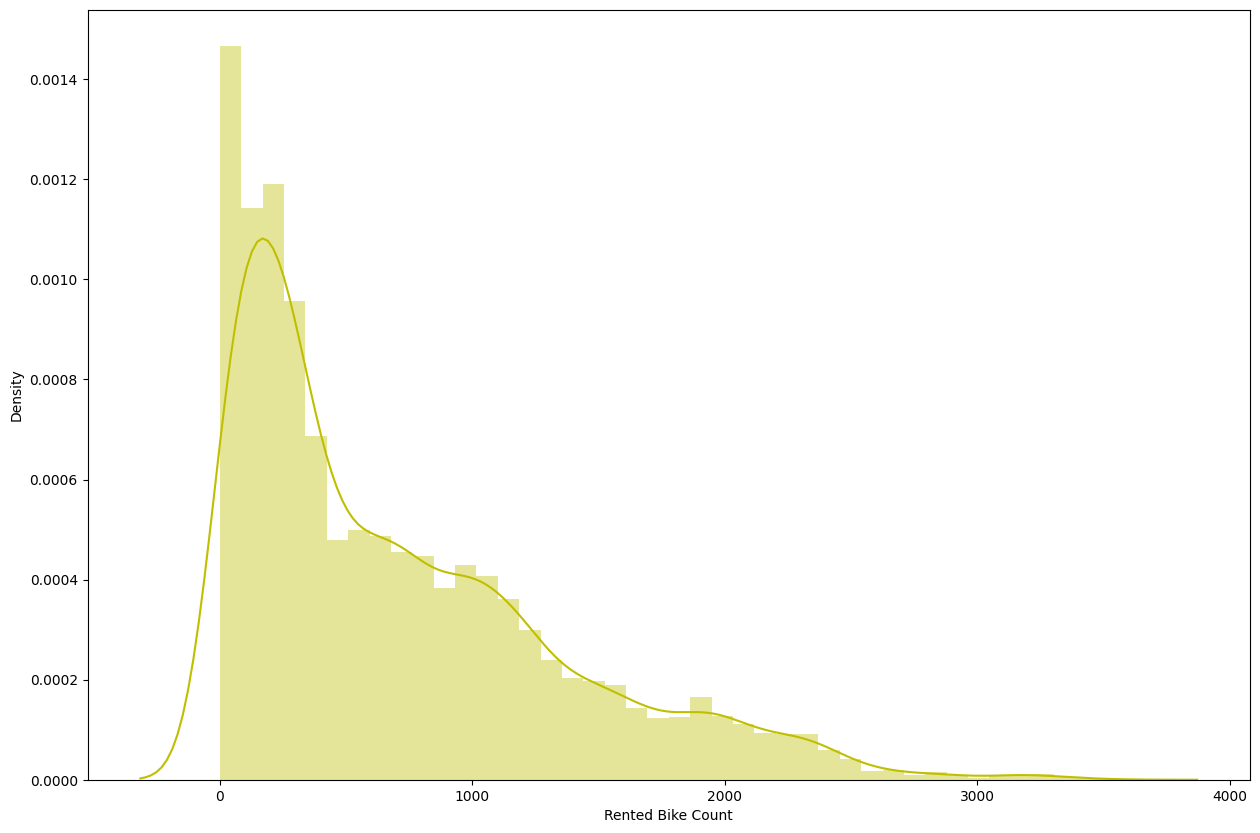

In [ ]:
# Chart - 1 visualization code 
# Dependent variable 'Rented Bike Count'
plt.figure(figsize=(15,10))
sns.distplot(dataset['Rented Bike Count'],color="y")

<Axes: xlabel='Rented Bike Count', ylabel='Density'>

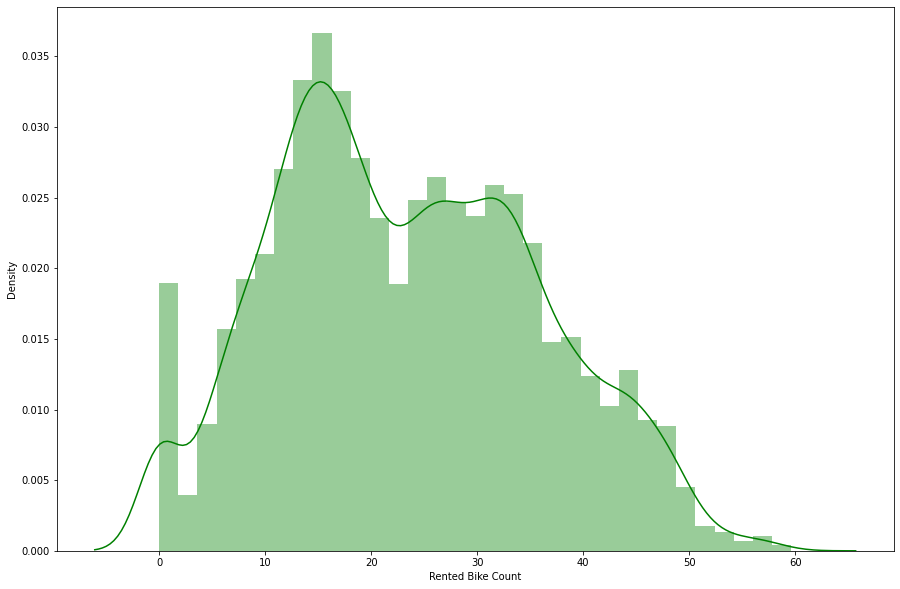

In [ ]:
# now the dependent variable show more skewness after doing the sqrt of dependent variable
plt.figure(figsize=(15,10))
sns.distplot(np.sqrt(dataset['Rented Bike Count']),color="g")

##### 1. Why did you pick the specific chart?

 distribution plot, depicts the variation in the data distribution.

##### 2. What is/are the insight(s) found from the chart?

## **data distribution of our dependant variable Our data in green plot is normalized to some extent: so we will go with square root on our dependent variable **

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

### **Our data in green plot is normalized to some extent: so we will go with square root on our dependent variable**

#### Chart - 2

In [ ]:
numeric_features = dataset_pr.describe().columns

In [ ]:
numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Day', 'Month', 'Year', 'Functioning Day_No',
       'Functioning Day_Yes'],
      dtype='object')

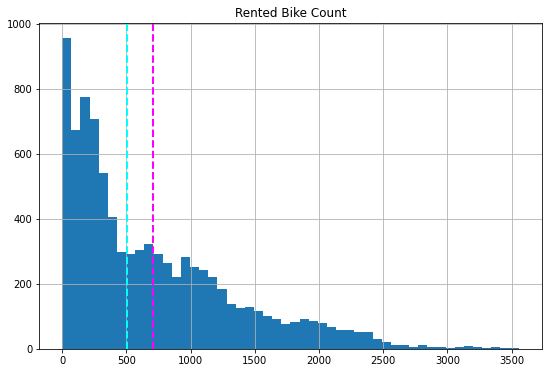

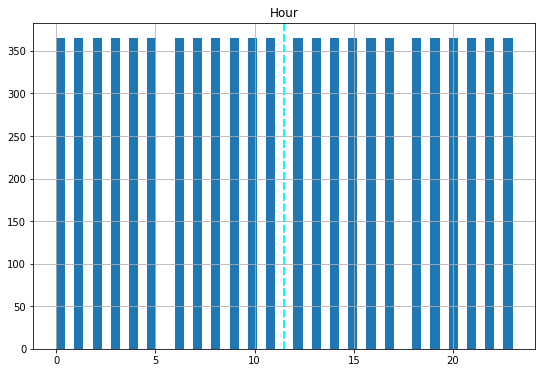

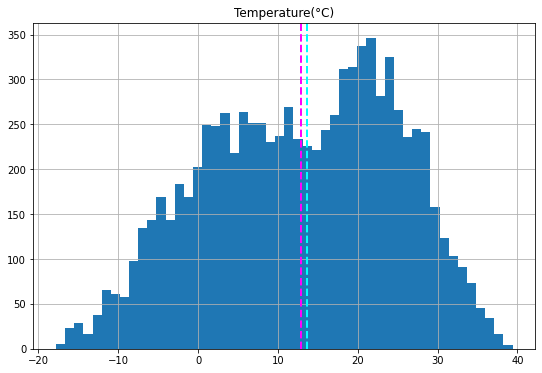

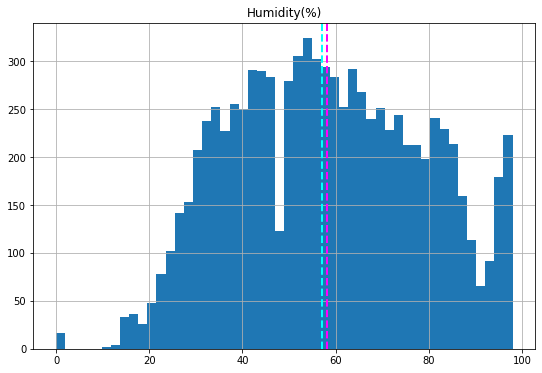

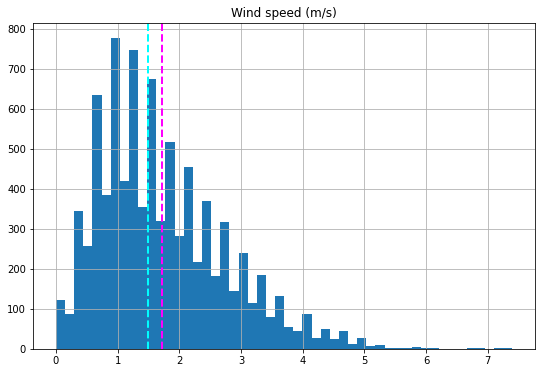

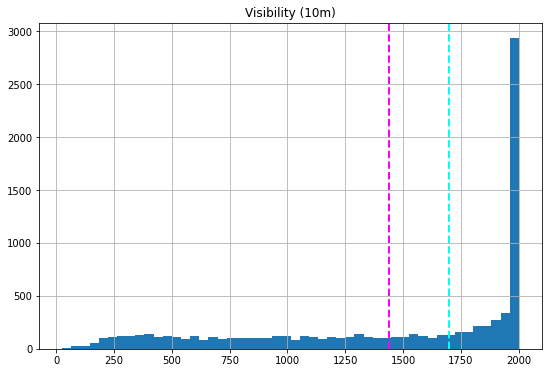

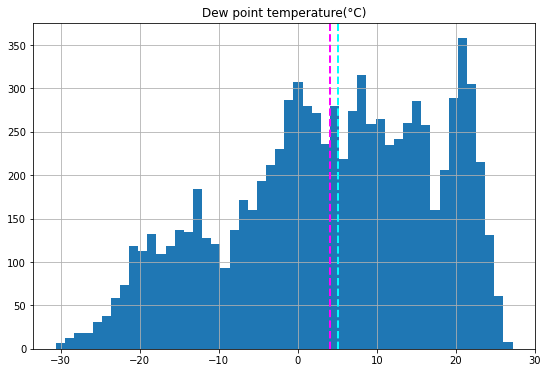

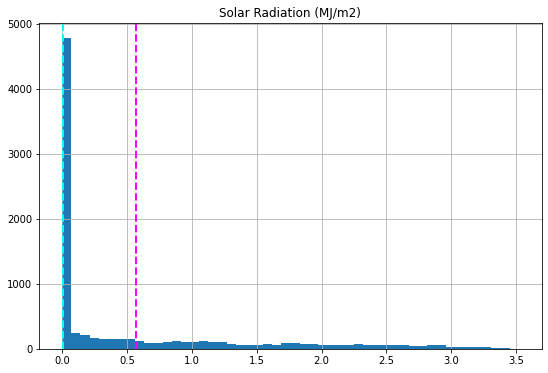

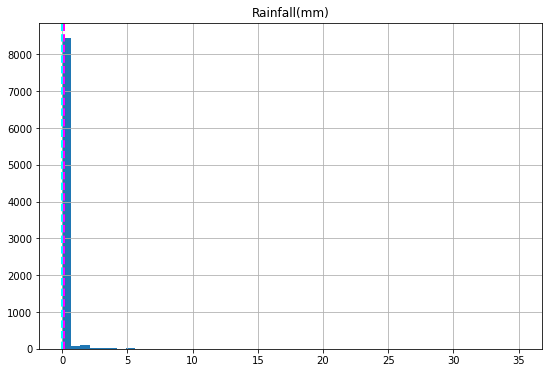

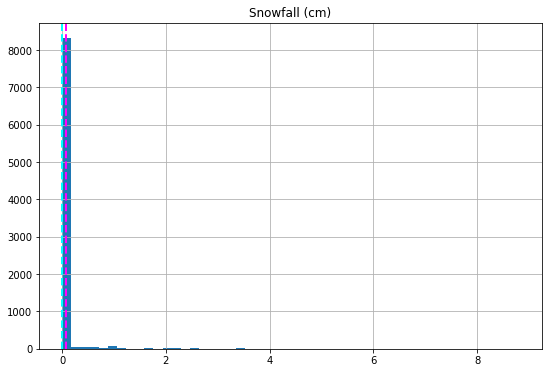

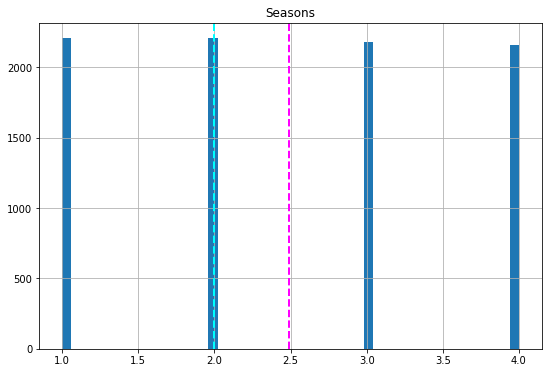

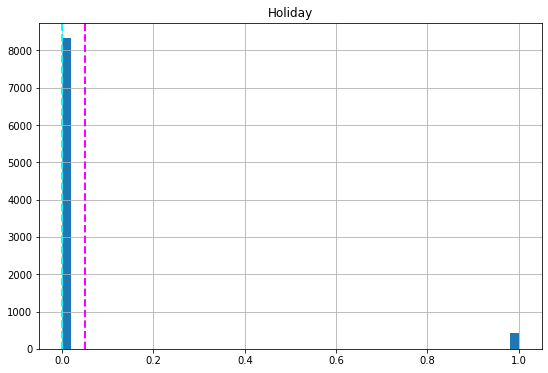

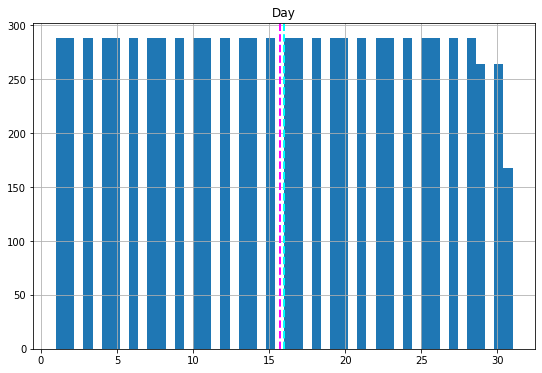

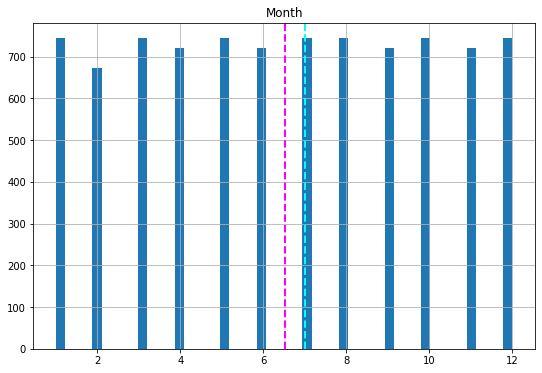

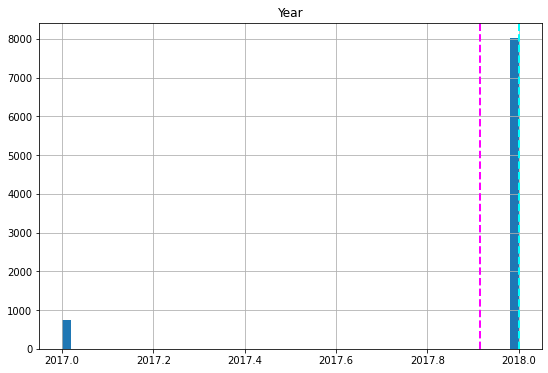

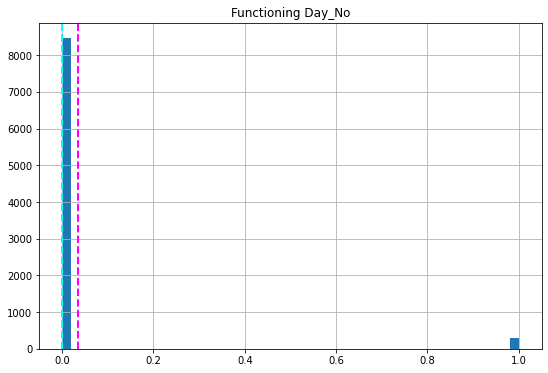

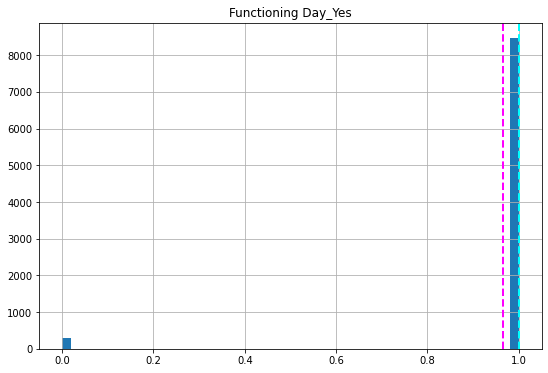

In [ ]:
# Chart - 2 visualization code 
#@title Default title text
# plot a hist plot for each numerical feature count 

for col in numeric_features[0:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset_pr[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

##### 1. Why did you pick the specific chart?

**to know the mean and median of our numeric variable**

##### 2. What is/are the insight(s) found from the chart?

**the mean and meadian **

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**the following hist plot shows the value of  variable how they vary with in mean and median range **

#### Chart - 3

In [ ]:
# Chart - 3 visualization code 
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

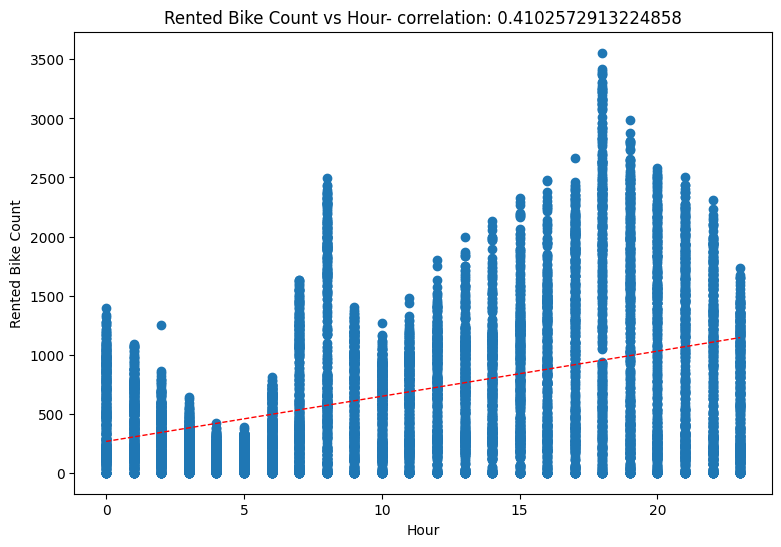

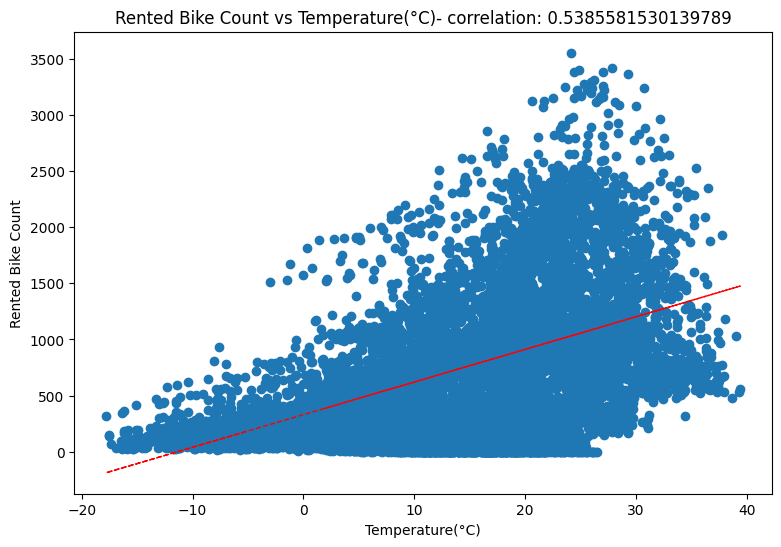

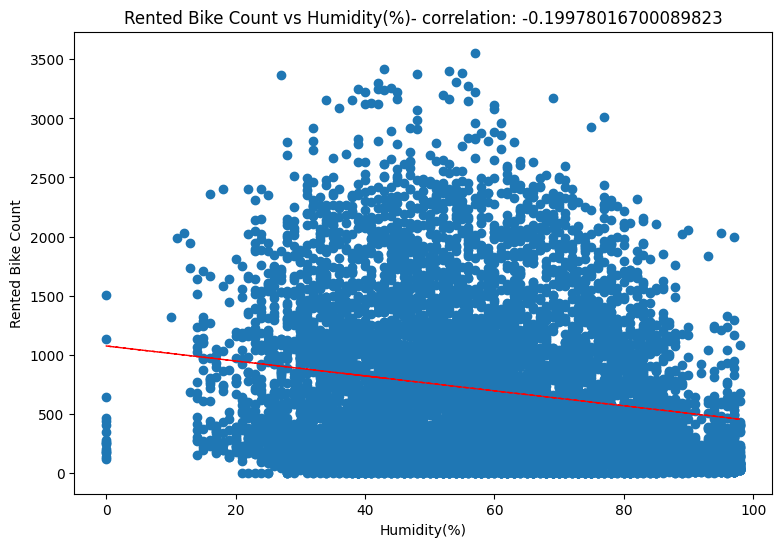

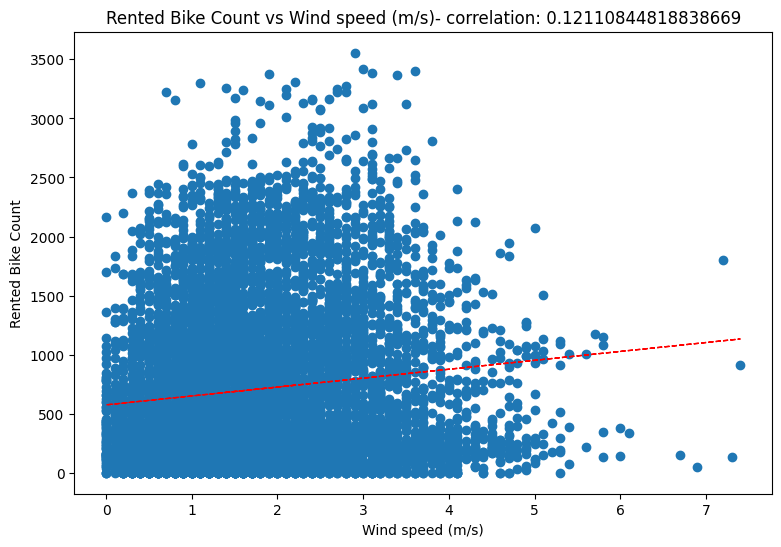

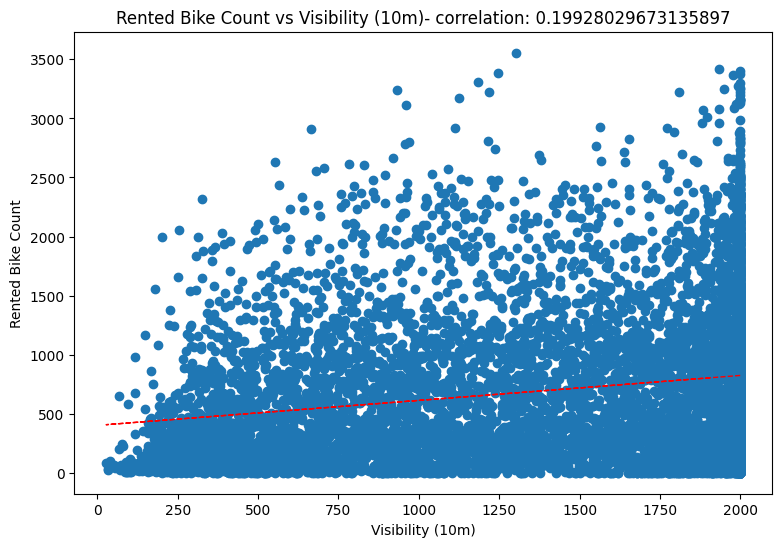

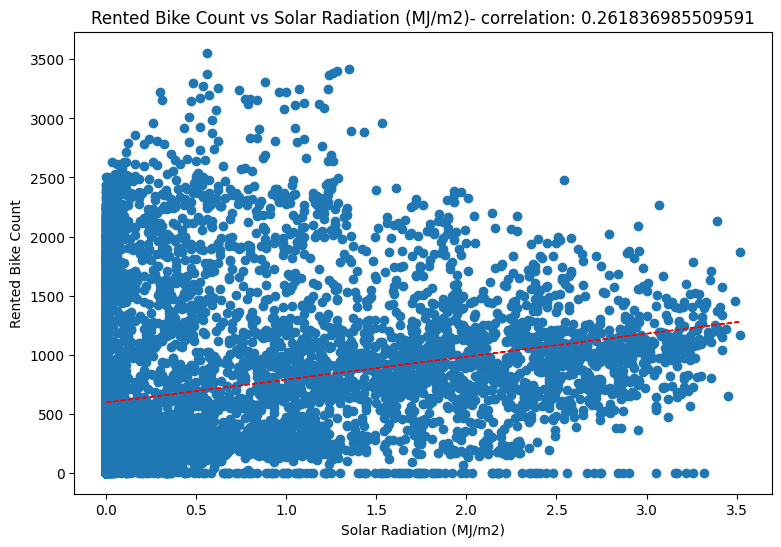

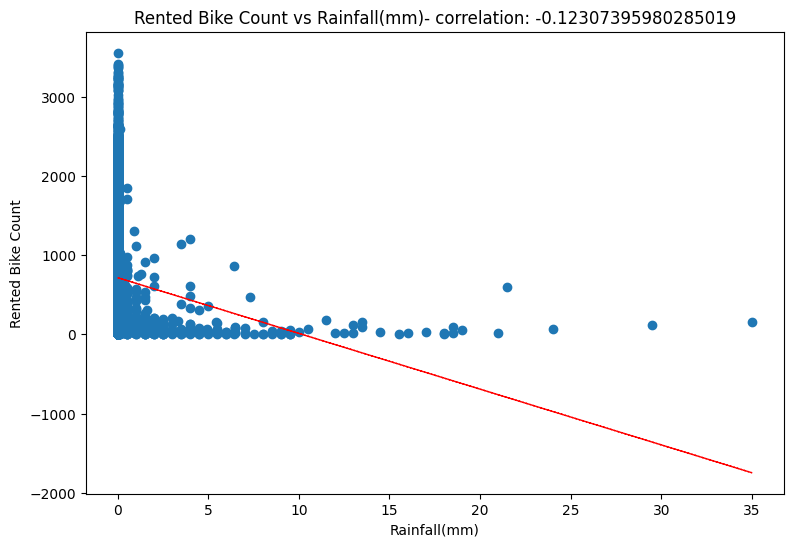

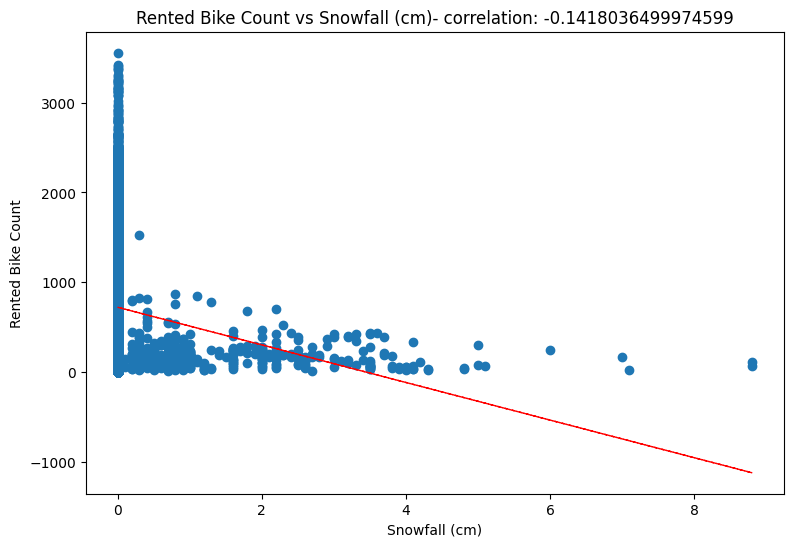

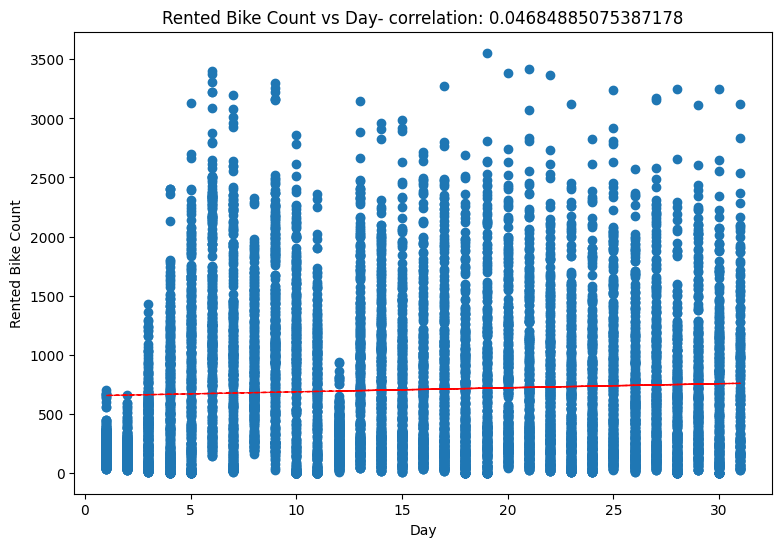

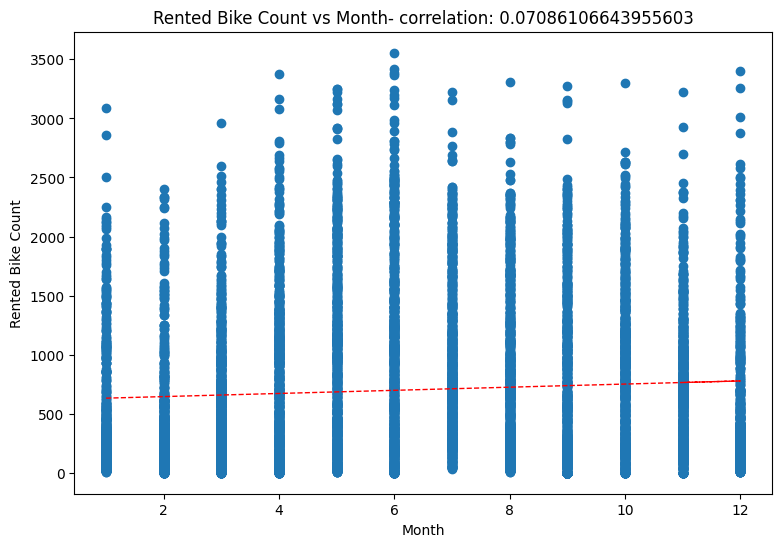

In [ ]:
# before the dummification /scatter plot for linear relation
for col in numeric_feature[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset_pr[col]
    label = dataset_pr['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()

##### 1. Why did you pick the specific chart?

### **to show the linear relation between the numerical feature and dependent variable**


##### 2. What is/are the insight(s) found from the chart?

### **the following scatter plot show the dependent variable co-relation with each of independant variable**

**. which variable are having a positive impact or negative impact on dependent variable**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

### **it shows the co-relation the dependent variable that is rented bike count is being rented more or less with respect to all the independent variable , for better information now we know which variable is profitable or not**

#### Chart - 4

In [ ]:
# Chart - 4 visualization code / 
categorical_features = dataset.describe(include=['object','category']).columns

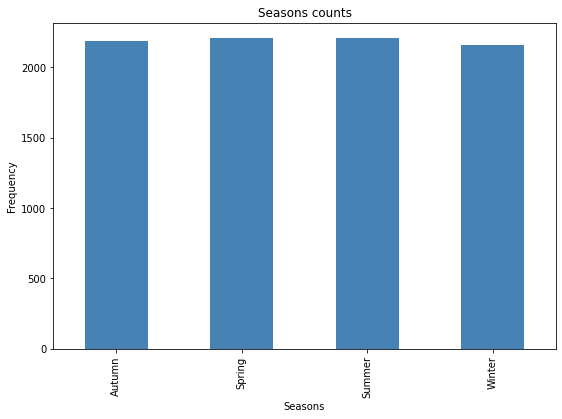

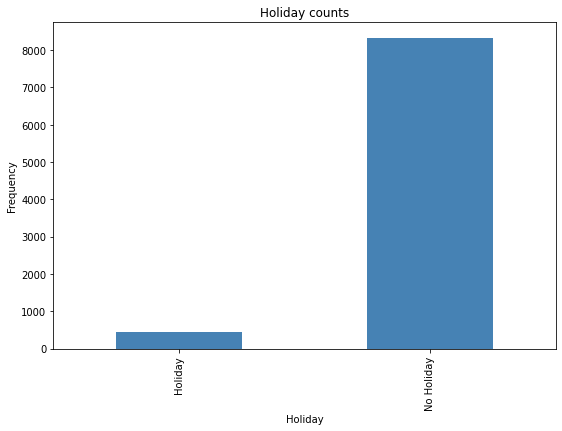

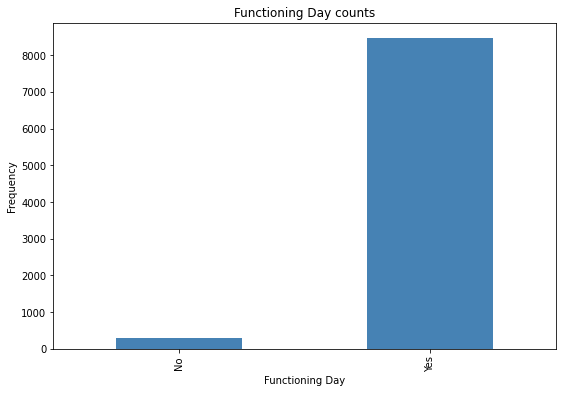

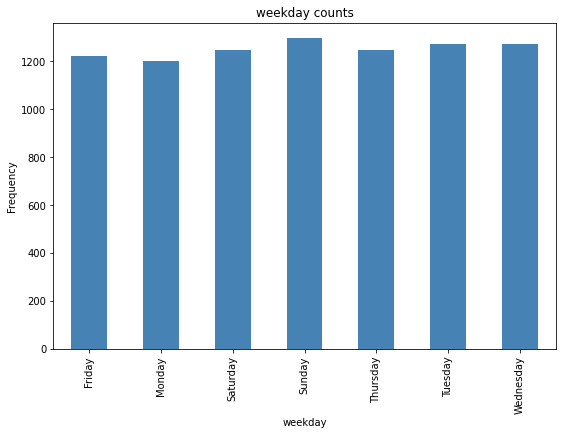

In [ ]:
# bar plot
for col in categorical_features:
    counts = dataset[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

##### 1. Why did you pick the specific chart?

### **plot a bar plot for each categorical feature count**

##### 2. What is/are the insight(s) found from the chart?

### **the insights are found that people who used to rent the bike basically in no holiday and functioning day means they r from working class**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

### **the people who used to rent the bike basically in no holiday and functioning day means they r from working class and we can avail the more bikes where working places are more**

#### Chart - 5

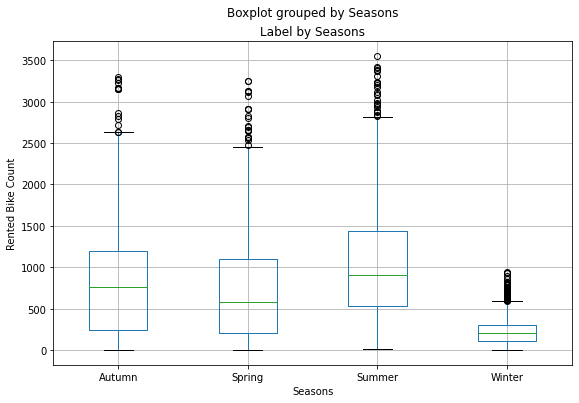

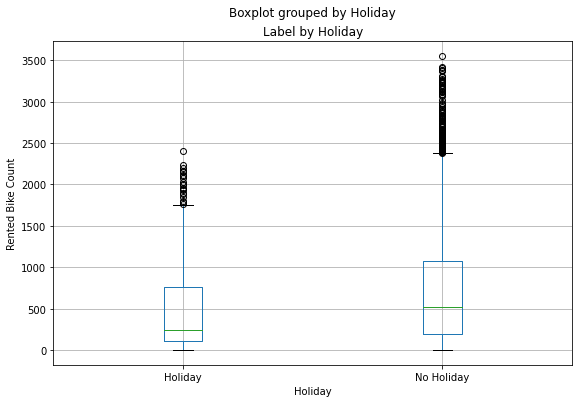

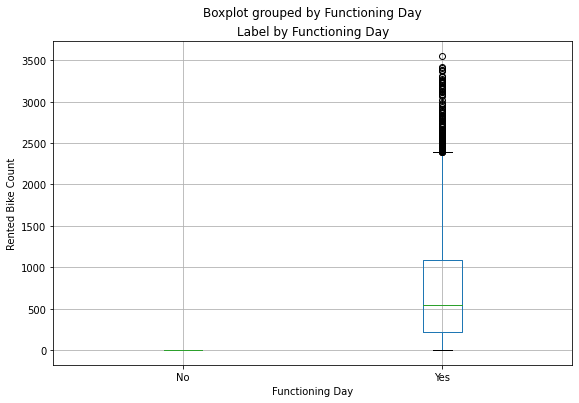

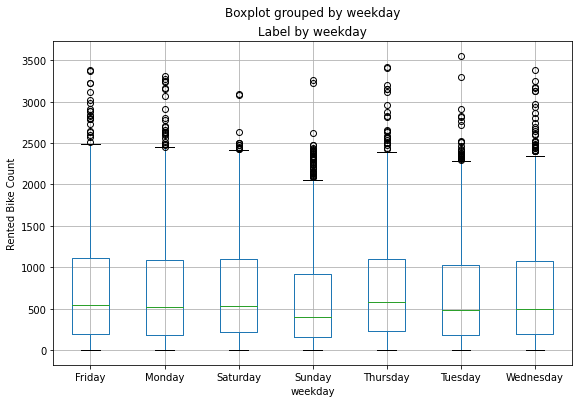

In [ ]:
# Chart - 5 visualization code / box plot

for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    dataset.boxplot(column = 'Rented Bike Count', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Rented Bike Count")
plt.show()

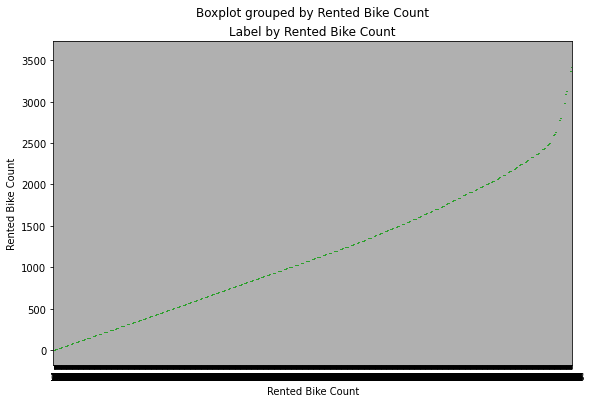

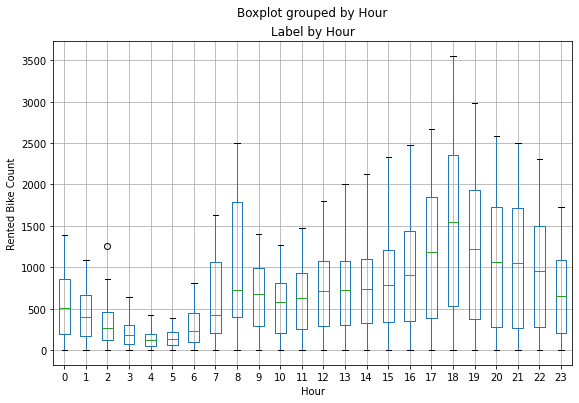

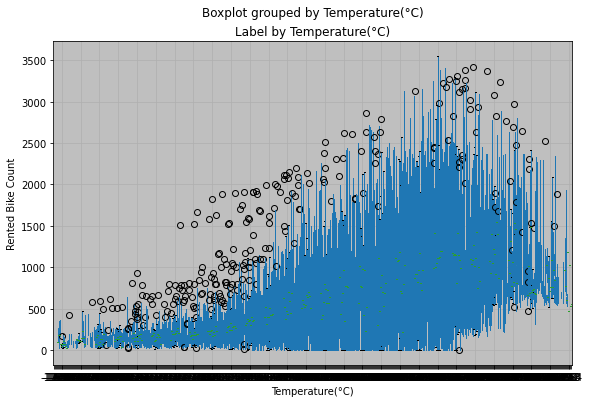

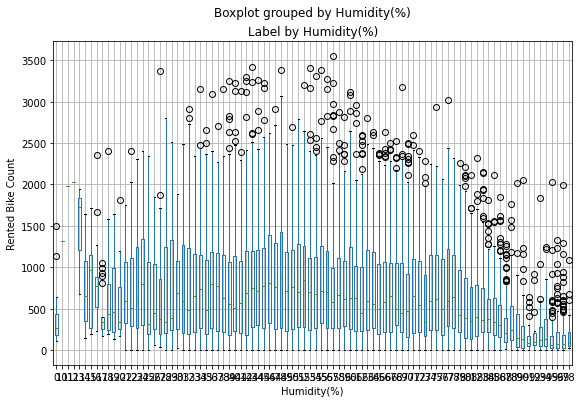

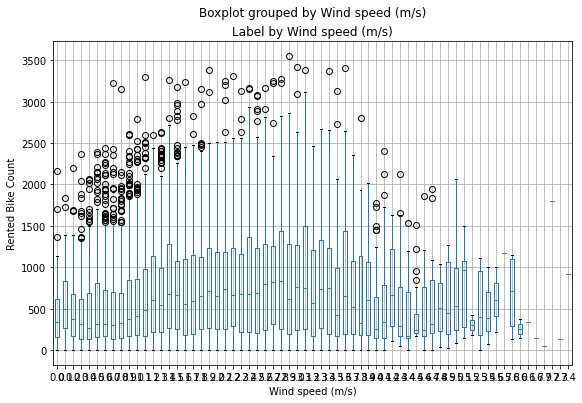

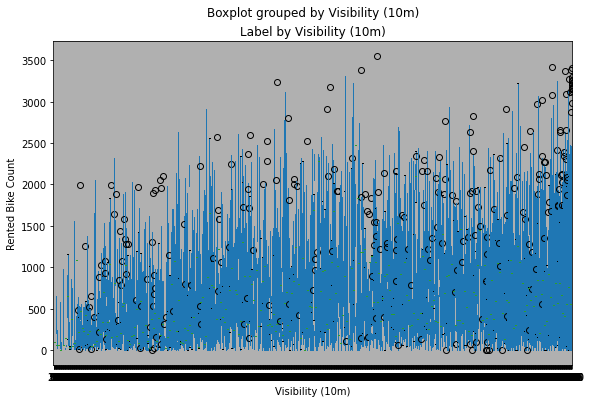

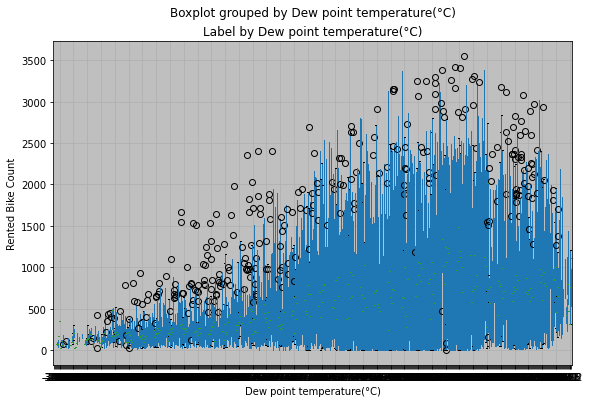

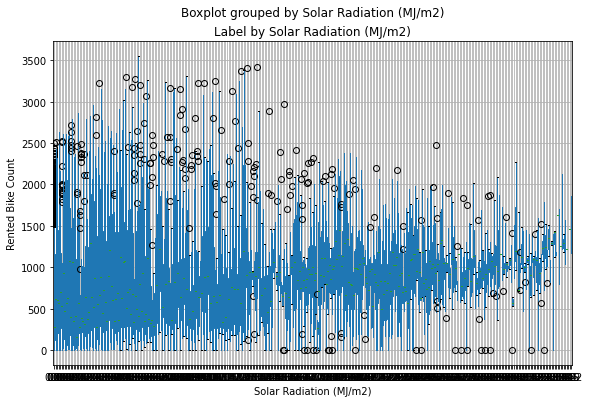

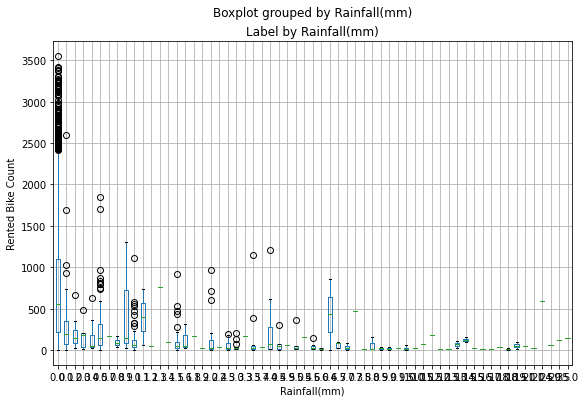

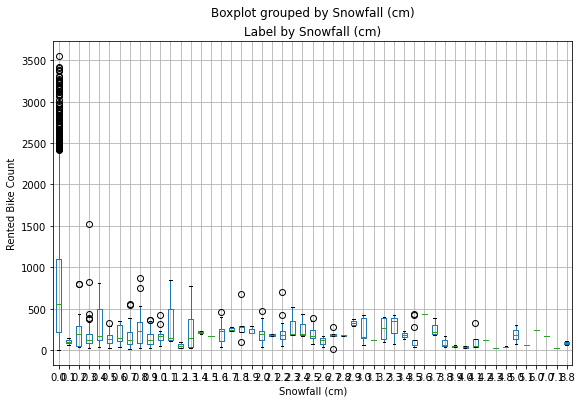

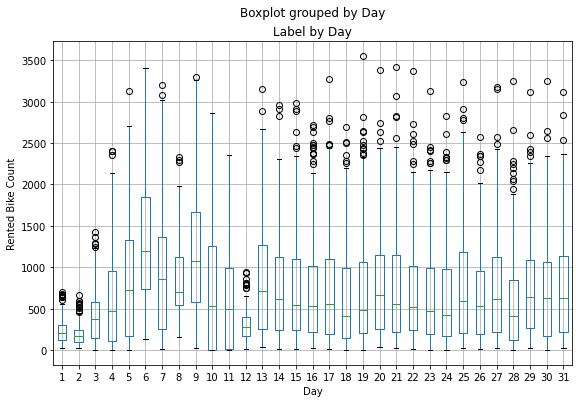

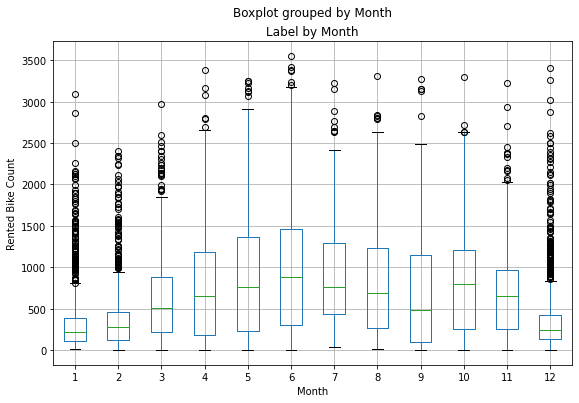

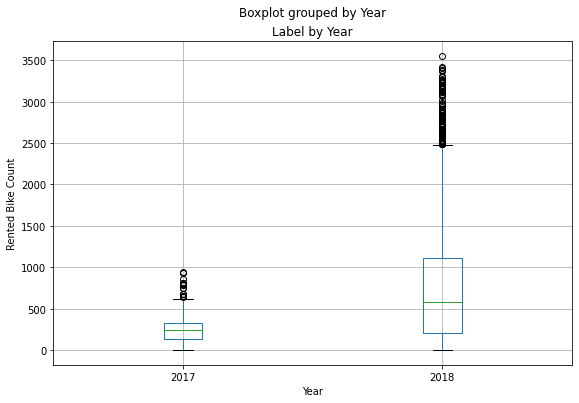

In [ ]:
for col in numeric_feature:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    dataset.boxplot(column = 'Rented Bike Count', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Rented Bike Count")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

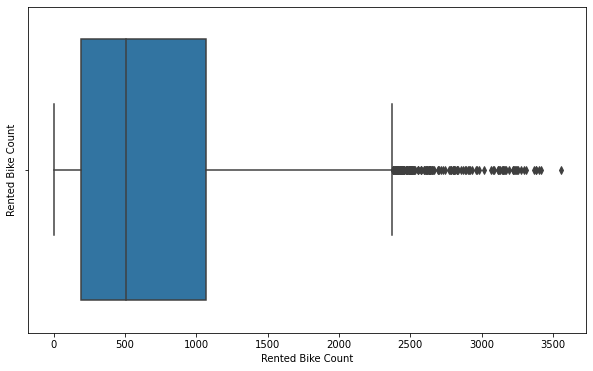

In [ ]:
# check the outliers in our dependent features
plt.figure(figsize=(10,6))

plt.ylabel('Rented Bike Count')
sns.boxplot(x=(dataset['Rented Bike Count']))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

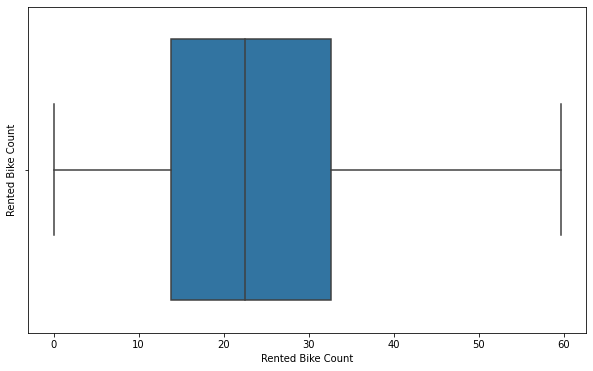

In [ ]:
#After applying sqrt on Rented Bike Count check wheater we still have outliers
plt.figure(figsize=(10,6))

plt.ylabel('Rented Bike Count')
sns.boxplot(x=np.sqrt(dataset['Rented Bike Count']))
plt.show

##### 1. Why did you pick the specific chart?

### **to check the outliers we use box plot**

##### 2. What is/are the insight(s) found from the chart?

there is definitly some utliers with every categorical and numerical features 


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**we have to only treat the outliers of our target variable for normalization**

#### Chart - 6

<Figure size 1440x432 with 0 Axes>

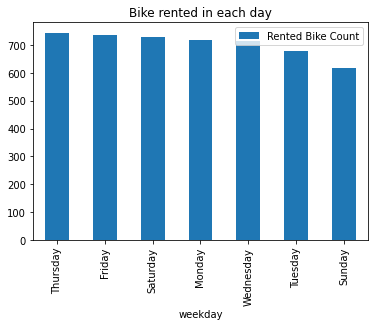

In [ ]:
# Chart - 6 visualization code 
plt.figure(figsize=(20, 6))

df_autox = pd.DataFrame(dataset.groupby(['weekday'])['Rented Bike Count'].mean().sort_values(ascending = False))
df_autox.plot.bar()
plt.title('Bike rented in each day')
plt.show()

<Figure size 1440x432 with 0 Axes>

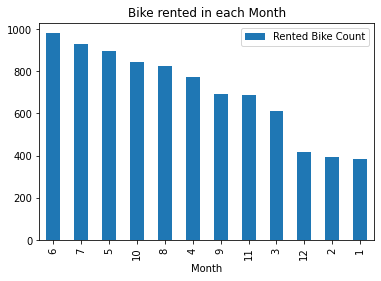

In [ ]:
plt.figure(figsize=(20, 6))

df_autox = pd.DataFrame(dataset.groupby(['Month'])['Rented Bike Count'].mean().sort_values(ascending = False))
df_autox.plot.bar()
plt.title('Bike rented in each Month')
plt.show()

##### 1. Why did you pick the specific chart?

**we plot the bar plot for seeing the variation of each month of bike share**

##### 2. What is/are the insight(s) found from the chart?

### **as we can see the more bike rented on june month followed by july , may **

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**when there is more temperature bike is bare rented more in that month , so we have to avail more bikes in that particular month**

#### Chart - 7

<Axes: xlabel='Temperature(°C)'>

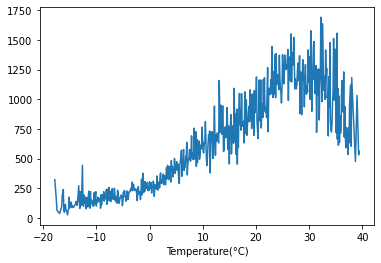

In [ ]:
# Chart - 7 visualization code 
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Temperature" 
dataset.groupby('Temperature(°C)').mean()['Rented Bike Count'].plot()

##### 1. Why did you pick the specific chart?


**print the plot to analyze the relationship between "Rented_Bike_Count" and "Temperature"**

##### 2. What is/are the insight(s) found from the chart?

**From the above plot we see that people like to ride bikes when it is pretty hot around 25°C in average**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

<Axes: xlabel='Solar Radiation (MJ/m2)'>

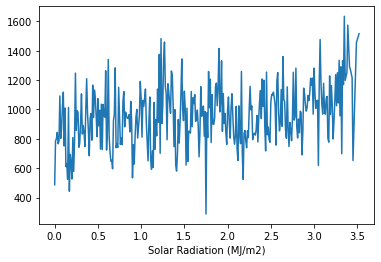

In [ ]:
# Chart - 8 visualization code 
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Solar_Radiation" 
dataset.groupby('Solar Radiation (MJ/m2)').mean()['Rented Bike Count'].plot()

##### 1. Why did you pick the specific chart?

**the plot to analyze the relationship between "Rented_Bike_Count" and "Solar_Radiation" **

##### 2. What is/are the insight(s) found from the chart?

**from the above plot we see that, the amount of rented bikes is huge, when there is solar radiation, the counter of rents is around 1000**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 9

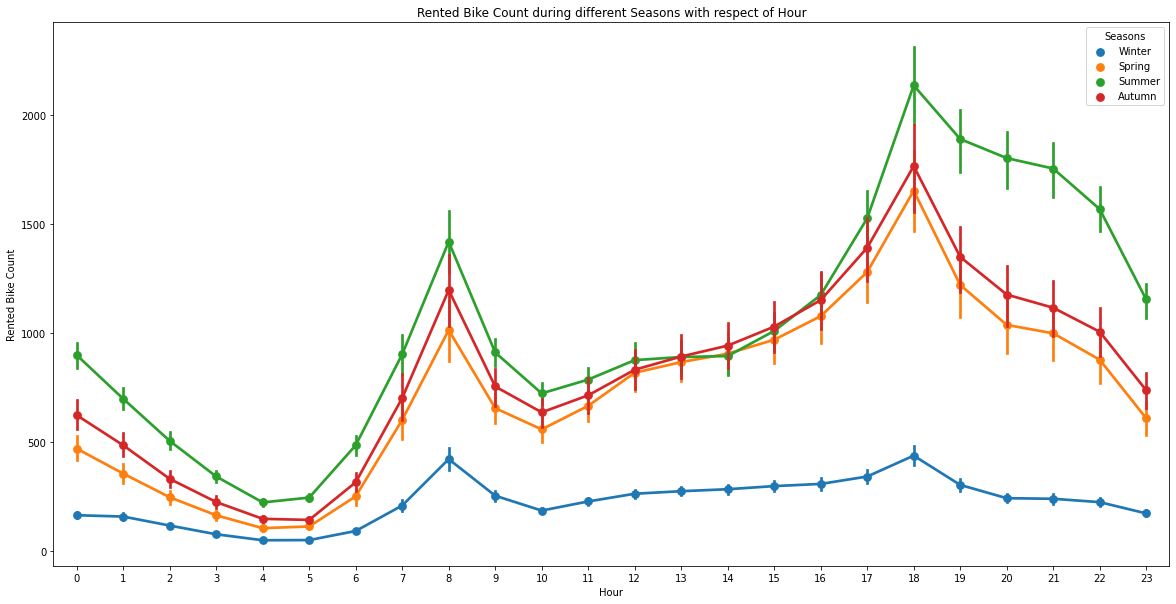

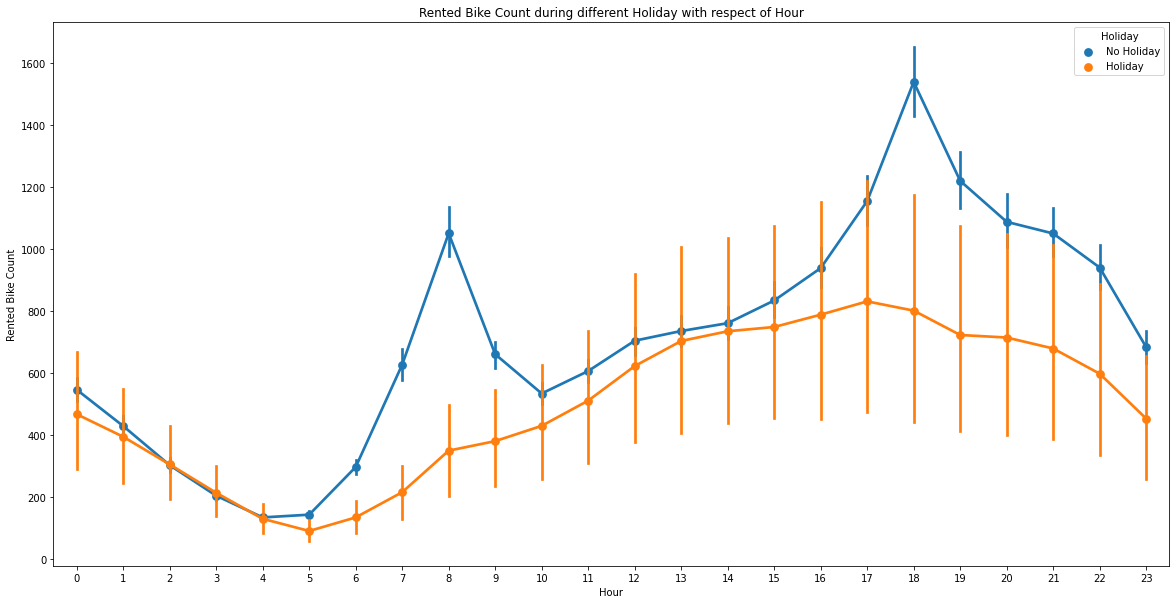

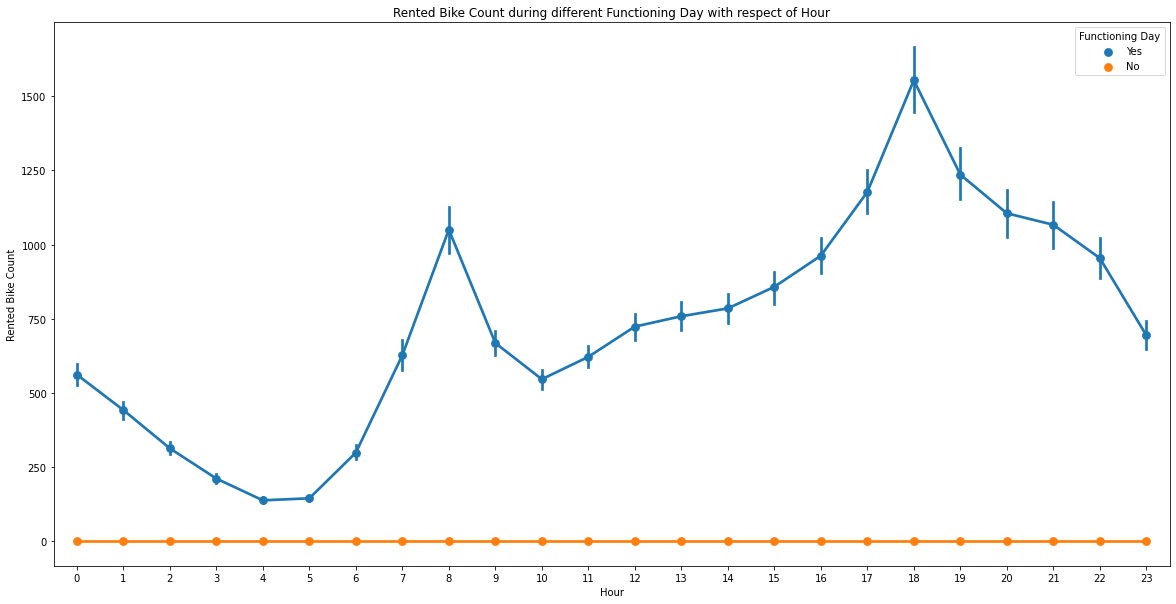

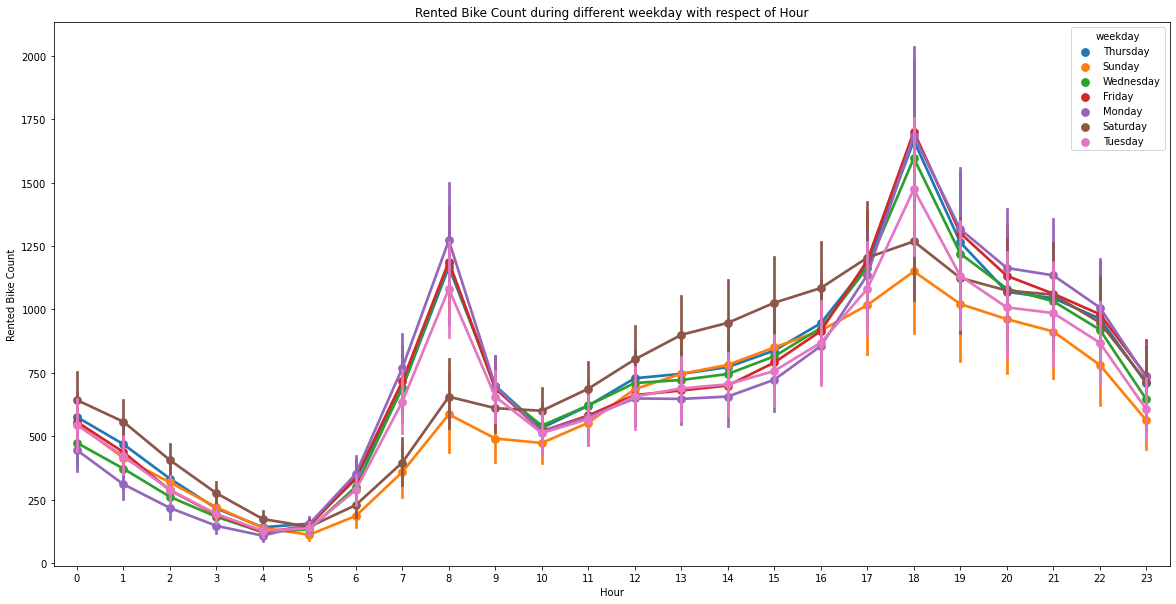

In [ ]:
# we create point plots with Rented Bike Count during different categorical features with respect of Hour
for i in categorical_features:
  if i == 'Hour':
    pass
  else:
    plt.figure(figsize=(20,10))
    sns.pointplot(x=dataset["Hour"],y=dataset['Rented Bike Count'],hue=dataset[i])
    plt.title(f"Rented Bike Count during different {i} with respect of Hour")
  plt.show()

##### 1. Why did you pick the specific chart?

### **From all these pointplot we have observed a lot from every column where demand is high or not**

##### 2. What is/are the insight(s) found from the chart?

***Season** -


In the season column, we are able to understand that the demand is low in the winter season

***Holiday-***

In the Holiday column, The demand is low during holidays, but in no holidays the demand is high, it may be because people use bikes to go to their work.

***Days of week-***

In the Days of week column, We can observe from this column that the pattern of weekdays and weekends is different.

***month-***

In the month column, We can clearly see that the demand is low in December January & Febuary, It is cold in these months and we have already seen in season column that demand is less in winters

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**in the weekend the demand becomes high in the afternoon. While the demand for office timings is high during weekdays**

**In the month column, We can clearly see that the demand is low in December January & Febuary, It is cold in these months and we have already seen in season column that demand is less in winters**

**The demand was less in 2017 and higher in 2018, it may be because it was new in 2017 and people did not know much about it.**

#### Chart - 10

<Axes: xlabel='Hour', ylabel='Density'>

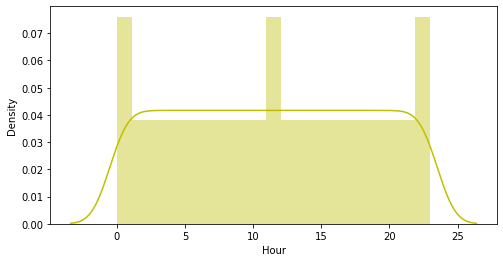

In [ ]:
plt.figure(figsize=(8,4))
sns.distplot(dataset['Hour'],color="y")

<Axes: xlabel='Temperature(°C)', ylabel='Density'>

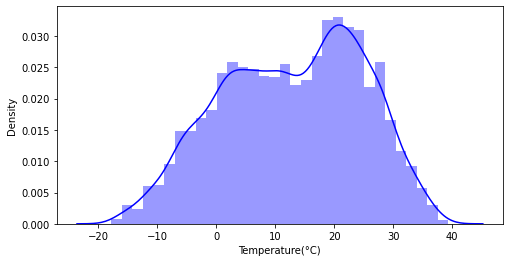

In [ ]:
plt.figure(figsize=(8,4))
sns.distplot(dataset['Temperature(°C)'],color="b")

##### 1. Why did you pick the specific chart?

### **density plot**

##### 2. What is/are the insight(s) found from the chart?

**data distribution and normalization of data**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

[Text(0.5, 1.0, 'Count of Rented bikes acording to Hour ')]

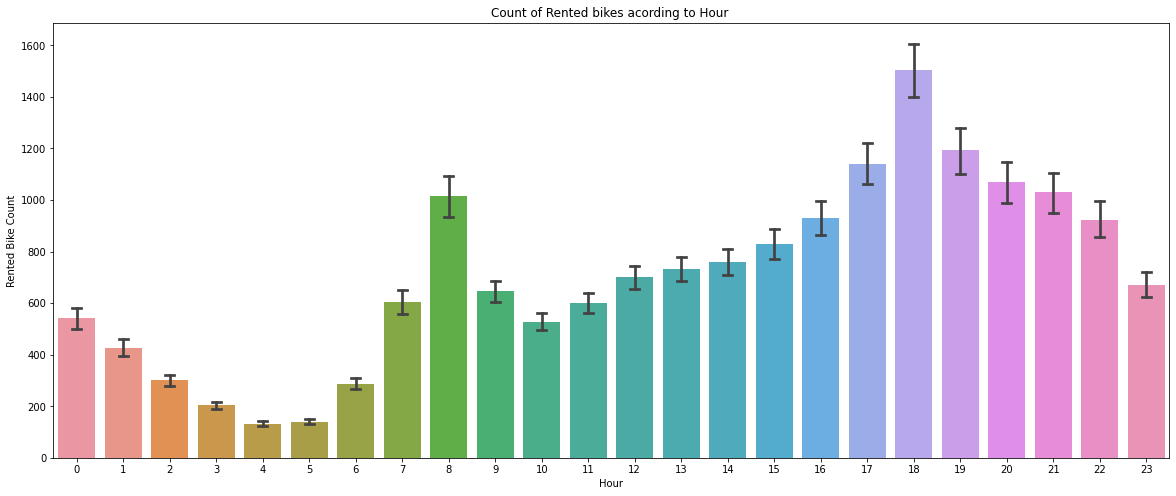

In [ ]:
# Chart - 11 visualization code 
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=dataset,x='Hour',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Hour ')

##### 1. Why did you pick the specific chart?

**Count of Rented bikes acording to Hour **

##### 2. What is/are the insight(s) found from the chart?

**In the above plot which shows the use of rented bike according the hours and the data are from all over the year.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**generally people use rented bikes during their working hour from 7am to 9am and 5pm to 7pm.**

#### Chart - 12

[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons ')]

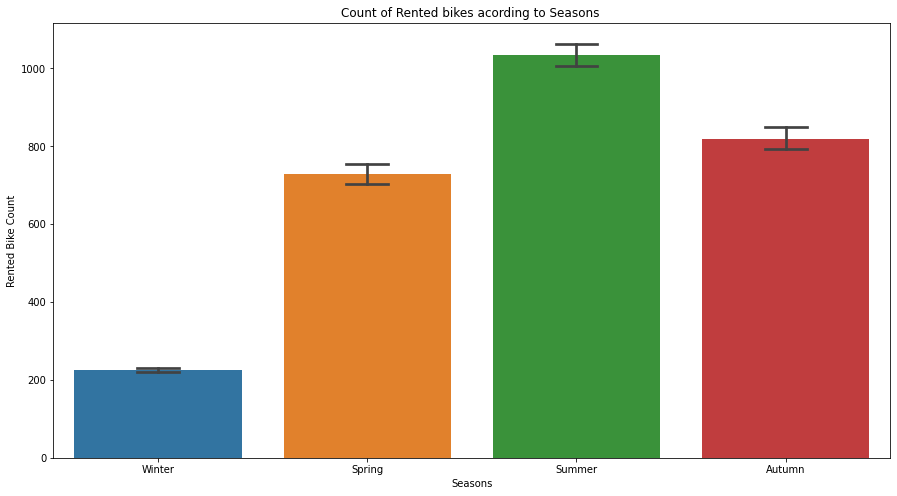

In [ ]:
# Chart - 12 visualization code
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=dataset,x='Seasons',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Seasons ')

##### 1. Why did you pick the specific chart?

**use subplot to visualize the rented bike count on every seasons**


##### 2. What is/are the insight(s) found from the chart?

**in summer where temperature in more in compare to other seasons the bike rented more**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**There is positive growth on bike rent count in summer and autumn**

#### Chart - 13

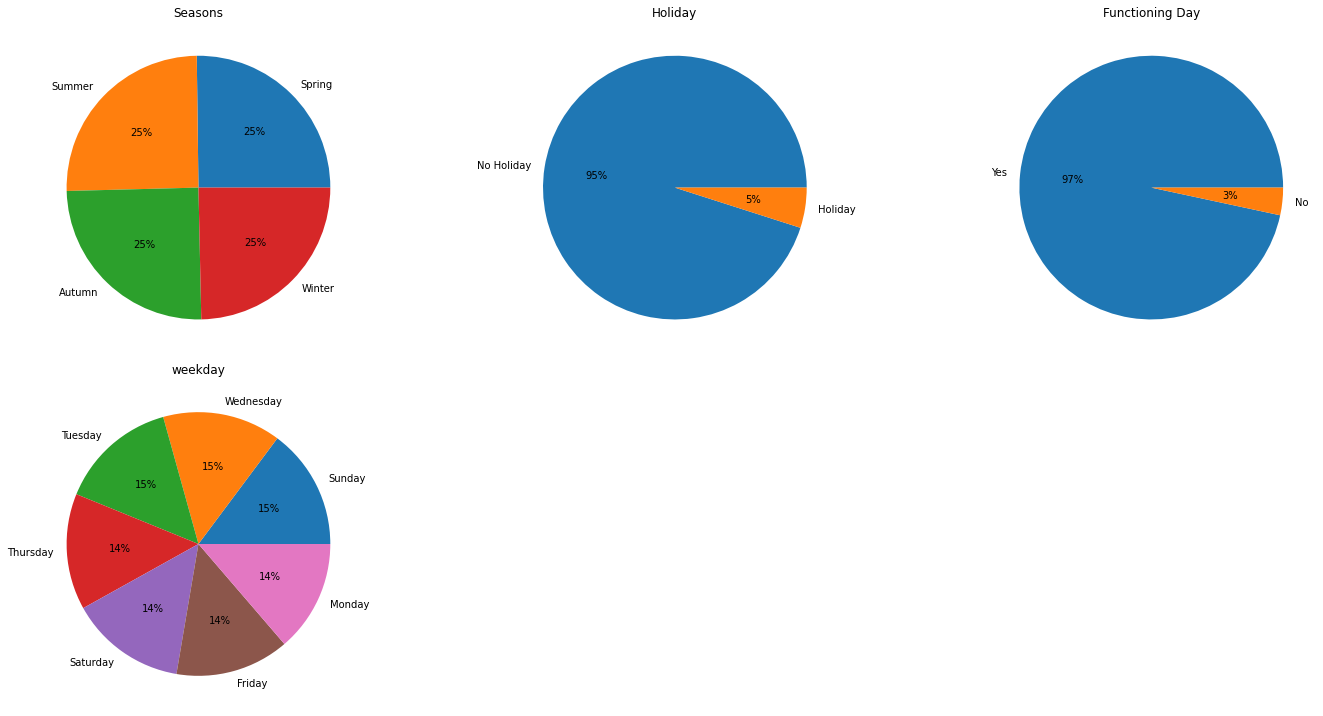

In [ ]:
# Chart - 13 visualization code 
# creating boxplot for all categorical feature
n=1
plt.figure(figsize=(20,15))
for i in categorical_features:
  plt.subplot(3,3,n)
  n=n+1
  plt.pie(dataset[i].value_counts(),labels = dataset[i].value_counts().keys().tolist(),autopct='%.0f%%')
  plt.title(i)
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation with Rented Bike Count
dataset.corr()['Rented Bike Count']

Rented Bike Count          1.000000
Hour                       0.410257
Temperature(°C)            0.538558
Humidity(%)               -0.199780
Wind speed (m/s)           0.121108
Visibility (10m)           0.199280
Solar Radiation (MJ/m2)    0.261837
Rainfall(mm)              -0.123074
Snowfall (cm)             -0.141804
Day                        0.046849
Month                      0.070861
Year                       0.215162
Name: Rented Bike Count, dtype: float64

<Axes: >

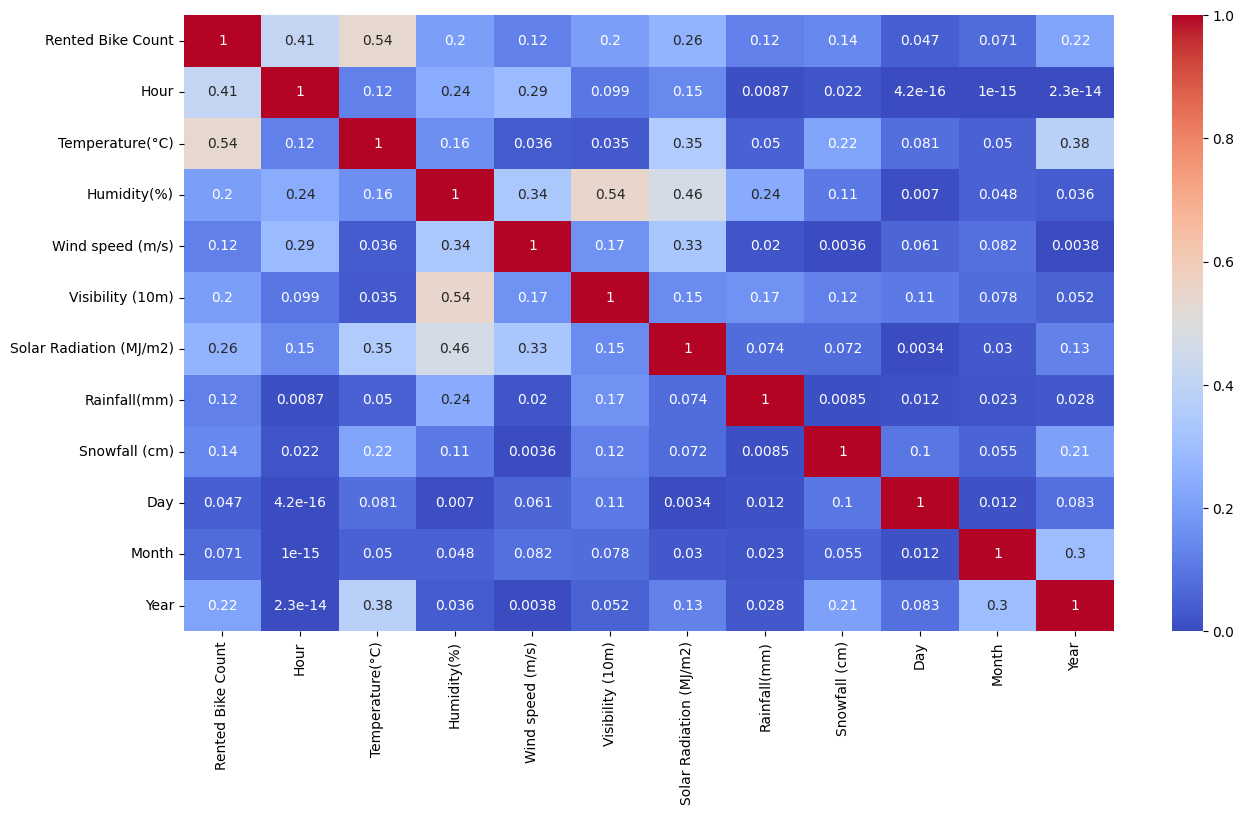

In [ ]:
# Correlation Heatmap visualization code 
 ## Correlation
plt.figure(figsize=(15,8))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Hour',	'Humidity(%)', 'Wind speed (m/s)',	'Visibility (10m)', 'Dew point temperature(°C)',	'Day',	'Month',	'Year',	'weekday']]])

variables       VIF
0        Rented Bike Count  2.771032
1          Temperature(°C)  3.110573
2  Solar Radiation (MJ/m2)  1.621497
3             Rainfall(mm)  1.045725
4            Snowfall (cm)  1.011237

In [ ]:
#drop the Dew point temperature column
dataset=dataset.drop(['Dew point temperature(°C)'],axis=1)

##### 1. Why did you pick the specific chart?

**to check the co relation of every variable**

##### 2. What is/are the insight(s) found from the chart?

**From the above correlation heatmap, We see that there is a positive correlation between columns 'Temperature' and 'Dew point temperature' i.e 0.9**

**so even if we drop this column then it dont affects the outcome of our analysis. And they have the same variations.. so we can drop the column 'Dew point temperature(°C)'.**

#### Chart - 15 - Pair Plot 

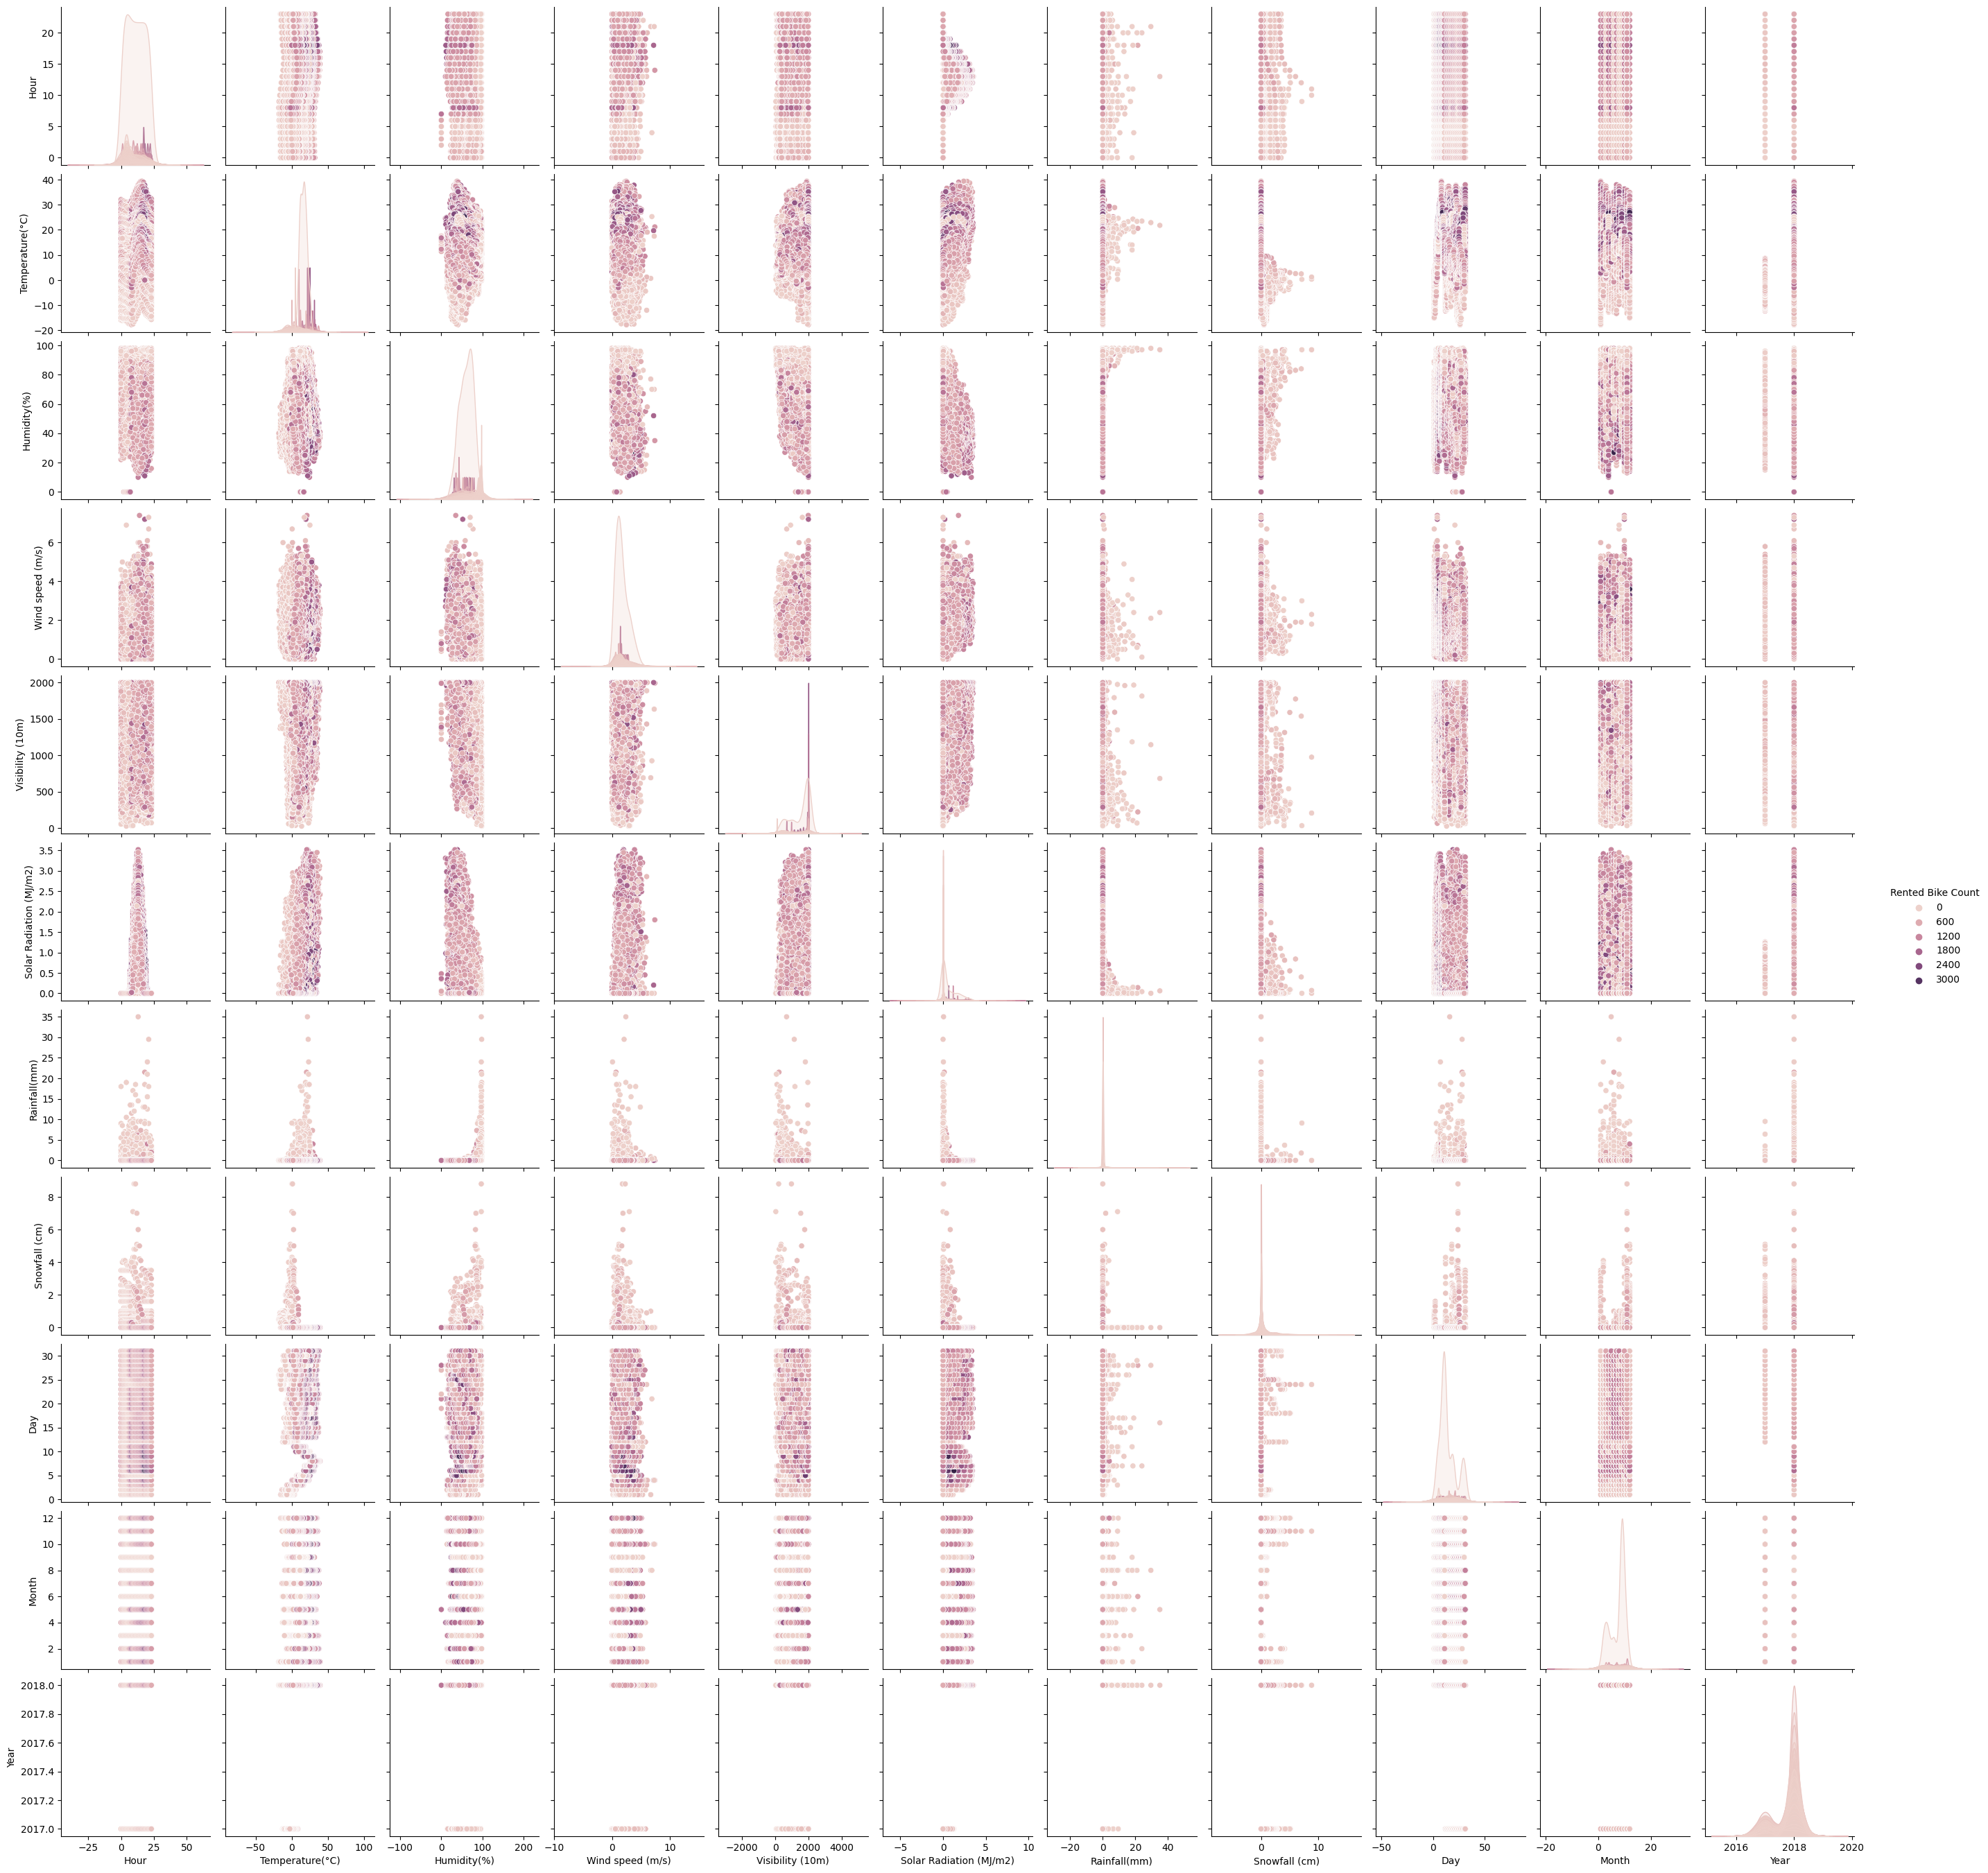

In [ ]:
# Pair Plot visualization code 
sns.pairplot(dataset, hue="Rented Bike Count")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

In [ ]:
dataset.agg(['skew', 'kurtosis']).transpose()

skew    kurtosis
Rented Bike Count           1.153428    0.853387
Hour                        0.000000   -1.204176
Temperature(°C)            -0.198326   -0.837786
Humidity(%)                 0.059579   -0.803559
Wind speed (m/s)            0.890955    0.727179
Visibility (10m)           -0.701786   -0.961980
Dew point temperature(°C)  -0.367298   -0.755430
Solar Radiation (MJ/m2)     1.504040    1.126433
Rainfall(mm)               14.533232  284.991099
Snowfall (cm)               8.440801   93.803324
Day                         0.007522   -1.193151
Month                      -0.010458   -1.207056
Year                       -2.978262    6.871614

**Right/Positive Skewed Distribution: Mode < Median < Mean: Rented Bike Count, Wind Speed(m/s), Solar Radiation(MJ/m2)**

**No Skew: Mean = Median = Mode : Hour, Temperature, Humidity(%),Rainfall(mm),Snowfall(cm)**

In [ ]:
from scipy import stats

In [ ]:
from scipy.stats import shapiro

In [ ]:
Datatotest =np.sqrt(dataset['Rented Bike Count'])

In [ ]:
stat, p = shapiro(Datatotest) 
print('stat=%.2f, p=%.25f' % (stat,p)) 
if p>0.05:
  print('normal distribution')
else:
  print('not a normal distribution ')

stat=0.98, p=0.0000000000000000000000000
not a normal distribution 


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis*

hence its p value is lower then 0.05 its reject the null hypothesis

#### 2. Perform an appropriate statistical test.

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

In [ ]:
from numpy.random import seed
from numpy.random import randn
from numpy.random import normal
from scipy.stats import ttest_1samp

In [ ]:
datatotest= np.sqrt(dataset_pr['Rented Bike Count'])

In [ ]:
stat, p = ttest_1samp(Datatotest,1.1) 
print('stat=%.3f, p=%.30f' % (stat,p)) 
if p>0.05:
  print('normal distribution')
else:
  print('not a normal distribution ')

stat=167.957, p=0.000000000000000000000000000000
not a normal distribution 


In [ ]:
from scipy.stats import ttest_ind

In [ ]:
datatotest1= dataset_pr['Temperature(°C)']

In [ ]:
datatotest2= dataset_pr['Rented Bike Count']

In [ ]:
ttest_ind(datatotest1,datatotest2, equal_var=False)

Ttest_indResult(statistic=-100.35739310670482, pvalue=0.0)

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**hence its p value is lower then 0.05 its reject the null hypothesis and accept the alternate hypothesis.**

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation 

## **There is no missing values in our dataset**

#### What all missing value imputation techniques have you used and why did you use those techniques?

### 2. Handling Outliers

##### What all outlier treatment techniques have you used and why did you use those techniques?

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns 
encoders_nums = {"Seasons":{"Spring":1,"Summer":2, "Autumn":3, "Winter":4},
                 "Holiday":{"Holiday":1,"No Holiday":0},
                 "Functioning Day ":     {"Yes": 1, "No": 0},
                 "weekday":{"Sunday": 1, "Wednesday": 4, "Tuesday ": 3, "Thursday": 5,
                                  "Saturday ": 7, "Friday": 6, "Monday":2 }
                 }

In [ ]:
# Dummification / ONE HOT ENCODING
dataset_pr = pd.get_dummies(dataset_pr, columns=["Functioning Day"])

#### What all categorical encoding techniques have you used & why did you use those techniques?

### **here I encode the categorical variables into numeric variables by data encoding and one hot encoding / dummification**

### **A one hot encoding allows the representation of categorical data to be more expressive. Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical.**

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction 

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features 

**in the above corelation heat map we have found that temperature has highly co related with dew temperature so I drop the dew temp column**

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting 

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
dataset_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   object 
 11  Day                      8760 non-null   int64  
 12  Month                    8760 non-null   int64  
 13  Year                     8760 non-null   int64  
 14  weekday                 

In [ ]:
numerical_features = ['Hour',	'Temperature(°C)',	'Humidity(%)','Wind speed (m/s)',	'Visibility (10m)',	'Solar Radiation (MJ/m2)',	'Rainfall(mm)',	'Snowfall (cm)',	'Seasons', 'Holiday',	'Day',	'Month',	'Year']

In [ ]:
features = numerical_features.copy()

### **Geting Feel of my X_train, X_test, y_train, y_test**

## **Implementing Linear Regression**

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model 
from scipy.stats import zscore
#Train test split

X = dataset_pr[features].apply(zscore)

In [ ]:
y = np.sqrt(dataset_pr['Rented Bike Count'])

In [ ]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented Bike Count, dtype: float64

In [ ]:
y.shape

(8760,)

In [ ]:
X.head()

Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0 -1.661325        -1.513957    -1.042483          0.458476          0.925871   
1 -1.516862        -1.539074    -0.993370         -0.892561          0.925871   
2 -1.372399        -1.580936    -0.944257         -0.699556          0.925871   
3 -1.227936        -1.597680    -0.895144         -0.796059          0.925871   
4 -1.083473        -1.580936    -1.091596          0.554978          0.925871   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)   Seasons   Holiday  \
0                -0.655132       -0.1318      -0.171891  1.351749 -0.227757   
1                -0.655132       -0.1318      -0.171891  1.351749 -0.227757   
2                -0.655132       -0.1318      -0.171891  1.351749 -0.227757   
3                -0.655132       -0.1318      -0.171891  1.351749 -0.227757   
4                -0.655132       -0.1318      -0.171891  1.351749 -0.227757   

       Day     Month      Year  
0 -0.42297 -1.602745 -3.282407  
1 -0.42297 -1.602745 -3.282407  
2 -0.42297 -1.602745 -3.282407  
3 -0.42297 -1.602745 -3.282407  
4 -0.42297 -1.602745 -3.282407

In [ ]:
X.shape

(8760, 13)

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.30, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(6132, 13)
(2628, 13)


In [ ]:
dataset_pr['Rented Bike Count'].describe()

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented Bike Count, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.score(X_train, y_train)

0.4979926403179852

In [ ]:
reg.coef_

array([ 3.46220174e+00,  6.19270456e+00, -3.14039615e+00, -7.19452700e-02,
        2.52970814e-01, -7.71361378e-01, -1.71354944e+00,  4.53753106e-03,
       -1.32217521e+00, -9.38363057e-01,  4.46892507e-01,  9.40019722e-01,
        1.93037804e-01])

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 81.3176066271338
RMSE : 9.017627549812302


In [ ]:
from sklearn.metrics import r2_score
r2_lr= r2_score(y_test,y_pred)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

R2 : 0.47058190086589036
Adjusted R2 : 0.46794898759552184


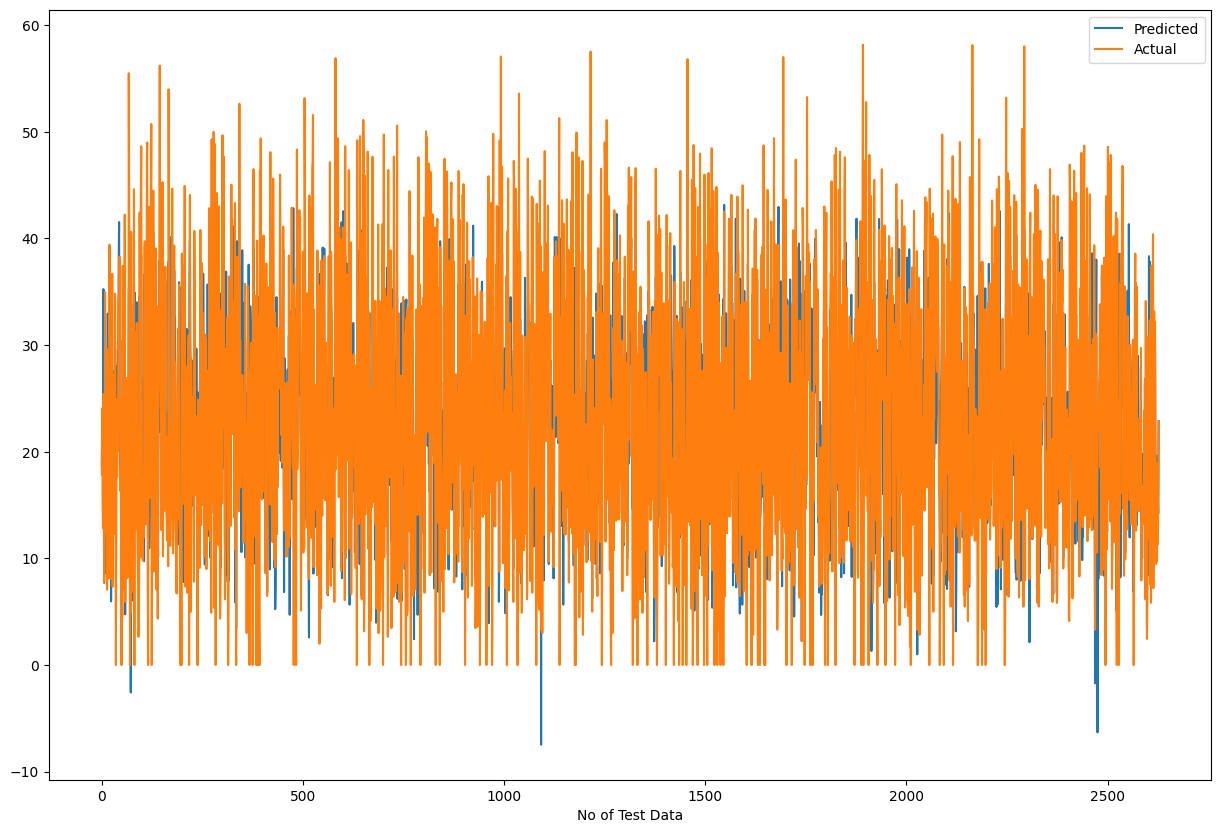

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

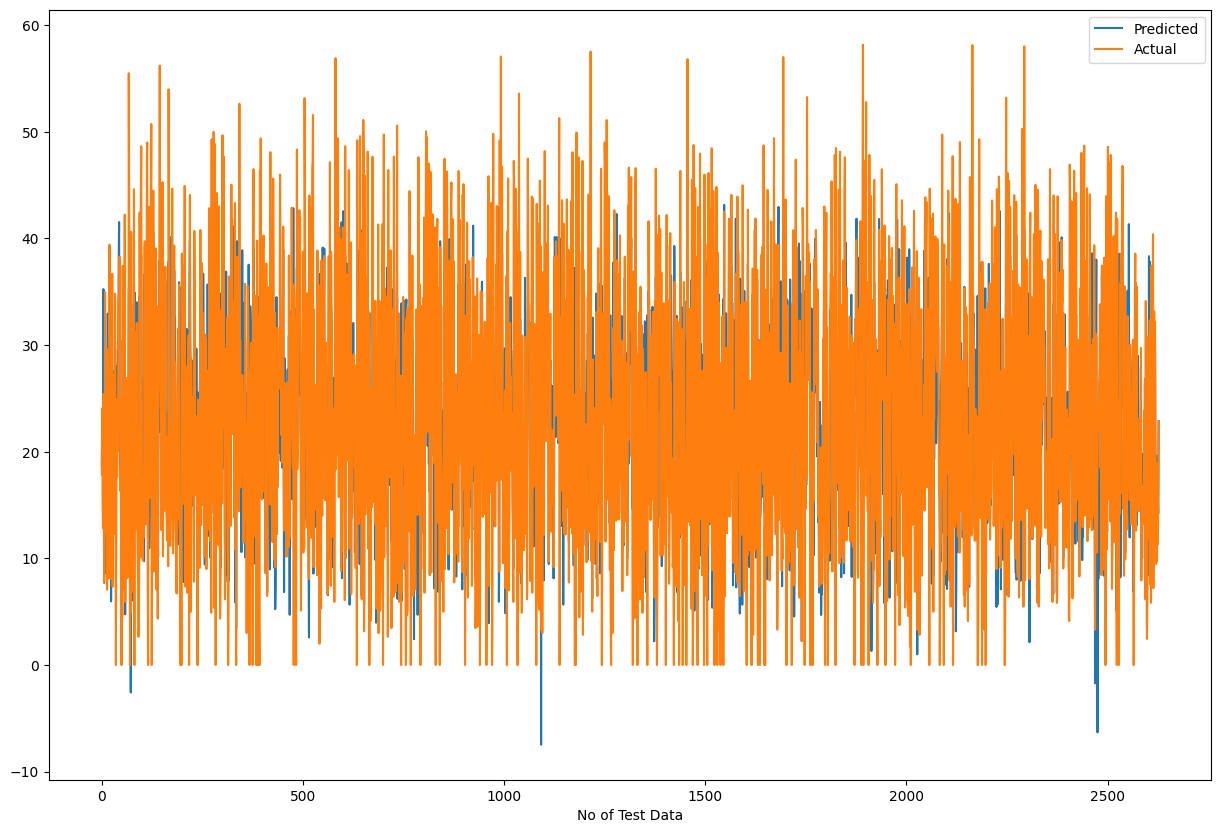

In [ ]:
# Visualizing evaluation Metric Score chart 
plt.figure(figsize=(15,10))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

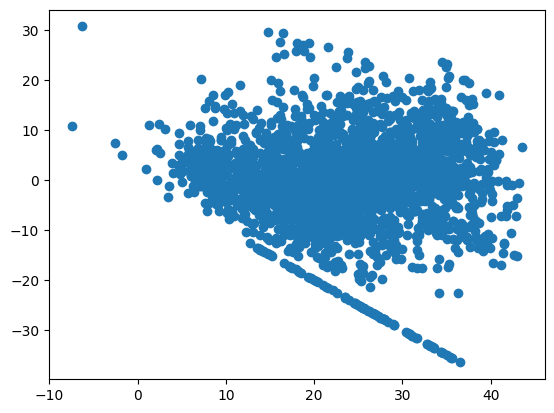

In [ ]:
### Heteroscadacity
plt.scatter((y_pred),(y_test)-(y_pred))

### **Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter)**

#### 2. Cross- Validation & Hyperparameter Tuning

### **Implementing Lasso regression** with GridSearchCV

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [ ]:
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -78.34612817798666


In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error((y_test), (y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 81.31559173193781
RMSE : 9.017515829314513
R2 : 0.4705950188366331
Adjusted R2 :  0.4679621708048337


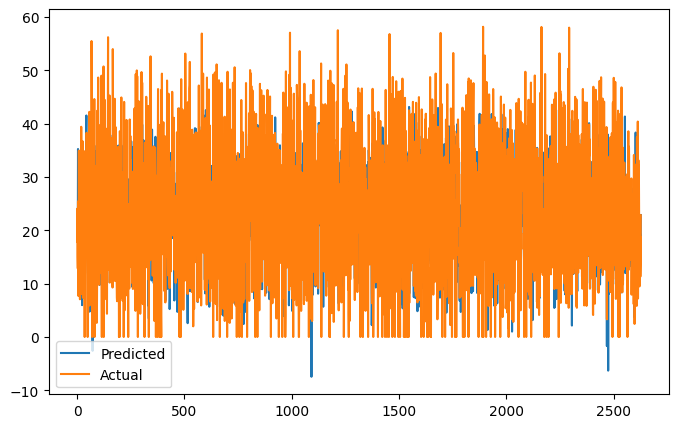

In [ ]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_lasso))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

##### Which hyperparameter optimization technique have you used and why?

 i use grid search cross validation for  hyperparameter 

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

since there is no such development on lasso and linear rigression we try another model for best result

## ML Model - 2 -Ridge Regression

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
from sklearn.linear_model import Ridge

ridge  = Ridge(alpha=0.1)

In [ ]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
ridge.score(X_train, y_train)

0.49799264007796584

In [ ]:
y_pred_r = ridge.predict(X_test)

In [ ]:
MSE  = mean_squared_error((y_test), (y_pred_r))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_r))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 81.3176241986645
RMSE : 9.017628524100141
R2 : 0.4705817864664783
Adjusted R2 :  0.4679488726271762


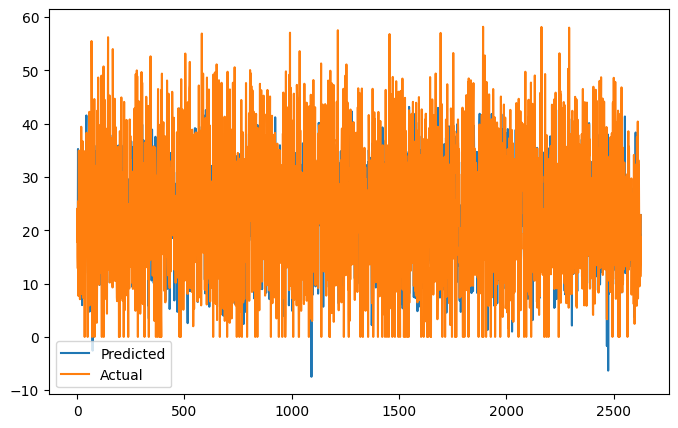

In [ ]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(8,5))
plt.plot((y_pred_r))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## **#Running Grid Search Cross Validation for Ridge Regression **

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

In [ ]:
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 5}

Using  {'alpha': 5}  the negative mean squared error is:  -78.34582606921414


In [ ]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error((y_test), (y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 81.31857126150308
RMSE : 9.017681035693327
R2 : 0.47057562061595026
Adjusted R2 :  0.46794267611251017


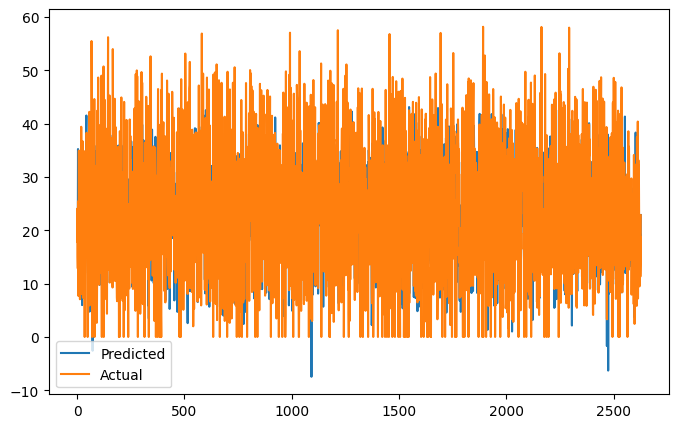

In [ ]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(8,5))
plt.plot((y_pred_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
(y_pred_lasso)

array([18.67785111, 21.6504539 , 19.38068698, ..., 15.54340528,
       14.21130137, 22.87269005])

##### Which hyperparameter optimization technique have you used and why?

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

even After doing  hyperparameter there is no such improvement in our model

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3 - Elastic net regression

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

In [ ]:
#Implementing Elastic net Regression
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
elasticnet.score(X_train, y_train)

0.495540049089056

In [ ]:
y_pred_en = elasticnet.predict(X_test)

In [ ]:
MSE  = mean_squared_error((y_test), (y_pred_en))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_en))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 81.61632300615955
RMSE : 9.03417528090747
R2 : 0.46863710853710006
Adjusted R2 :  0.4659945233844537


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

In [ ]:
#Running Grid Search Cross Validation for ELastic Net Regression 
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5,)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01, 'l1_ratio': 0.8}

Using  {'alpha': 0.01, 'l1_ratio': 0.8}  the negative mean squared error is:  -78.38809340709616


In [ ]:
MSE  = mean_squared_error((y_test), (y_pred_elastic))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_elastic))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_elastic)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 81.30289821303977
RMSE : 9.016811976138783
R2 : 0.47067765996350674
Adjusted R2 :  0.4680452229243046


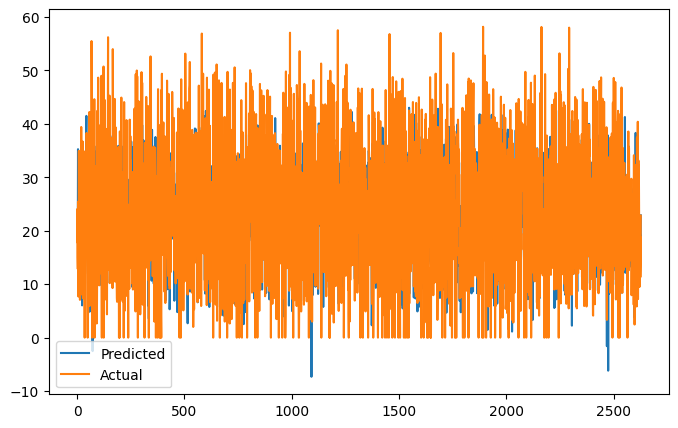

In [ ]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_elastic))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

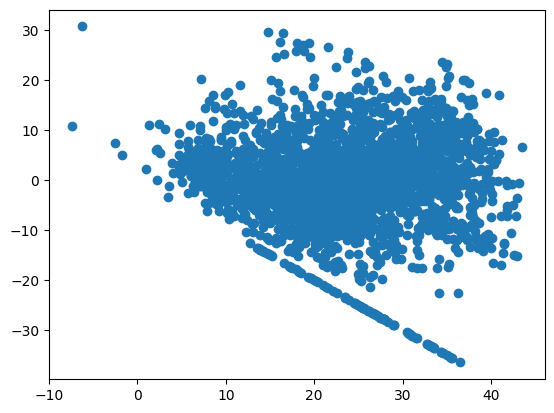

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_lasso),(y_test)-(y_pred_lasso))

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
print('Accuracy of Train Data :', cross_val_score(reg, X_train,y_train, cv=10 ))
print('Accuracy of Test Data :', cross_val_score(reg, X_test,y_test, cv=10 ))
predicted = reg.predict(X_test[:2])
print(predicted)

Accuracy of Train Data : [0.51706551 0.5044639  0.50382396 0.47431878 0.51202371 0.48953885
 0.49545725 0.45832109 0.44858427 0.53776995]
Accuracy of Test Data : [0.46190051 0.42739008 0.4955788  0.51439968 0.43879767 0.42695683
 0.43815468 0.48548555 0.49264104 0.47072444]
[18.67836002 21.65052653]


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

## ***implementing Decision tree ***

In [ ]:
#import the packages
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor(criterion='squared_error', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, max_features=9, max_leaf_nodes=100)

In [ ]:
y_pred_d = decision_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error((y_test), (y_pred_d))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_d))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 55.33067410582682
RMSE : 7.438459121742004
R2 : 0.6397697679023755
Adjusted R2 :  0.6379782633051034


In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(X_train,y_train))

Model Score: 0.7457012393171798


In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

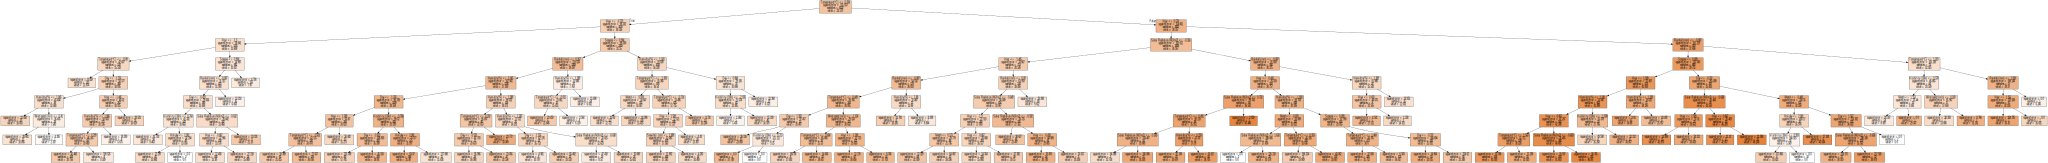

In [ ]:
graph = Source(tree.export_graphviz(decision_regressor, out_file=None
   , feature_names=X_train.columns, class_names=['0', '1'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

**As we can see temperature is most important variable for our dependent variable (rented bike count) followed by season and hour**

**The r2_score for the test set is 0.64. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter)**

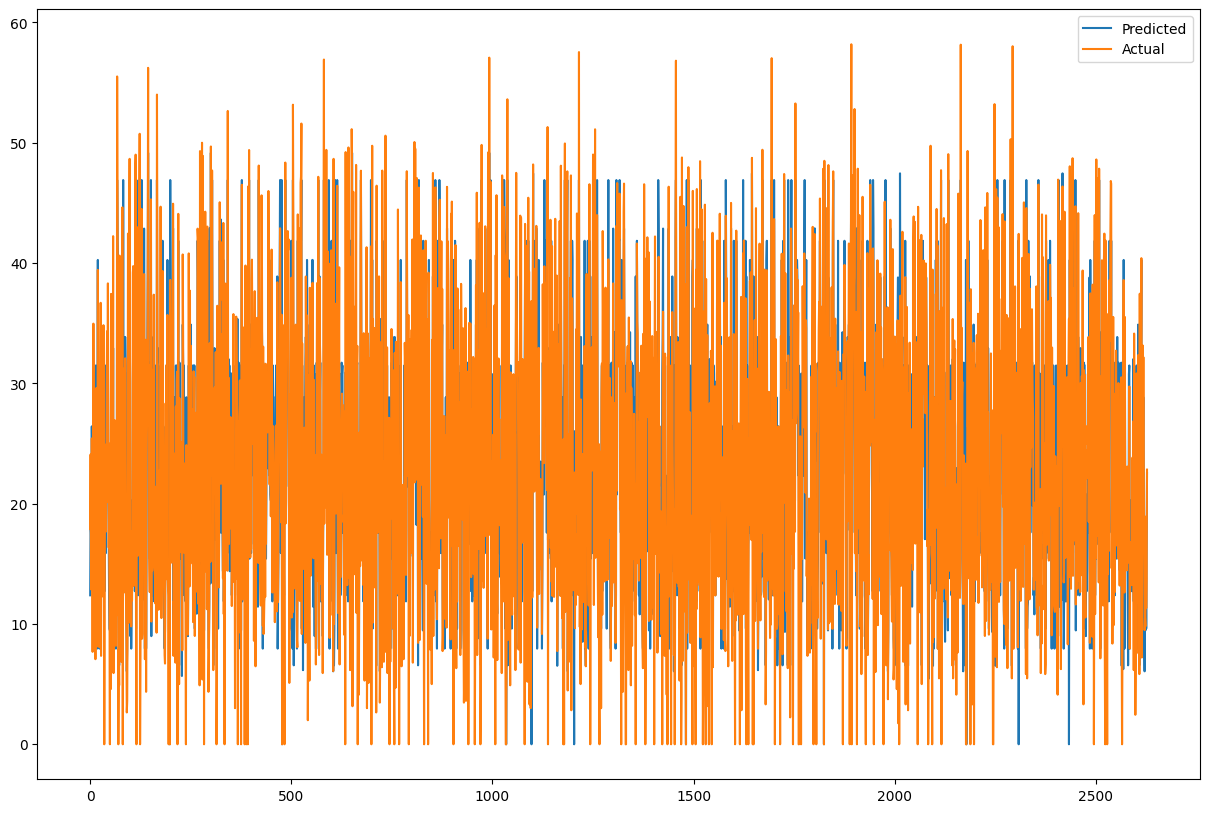

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((np.array(y_pred_d)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

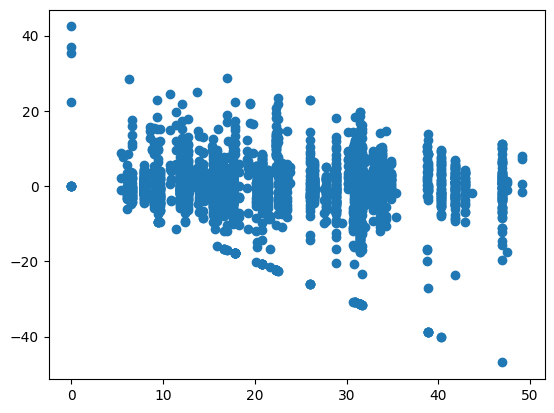

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_d),(y_test)-(y_pred_d))

### **ensembling Random forest**

In [ ]:
#import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred_f = rf_model.predict(X_test)

In [ ]:
# Number of trees
n_estimators = [60,70,80]

# Maximum depth of trees
max_depth = [6,7,8]

# Minimum number of samples required to split a node
min_samples_split = [50,75,100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,45,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
param_dict

{'n_estimators': [60, 70, 80],
 'max_depth': [6, 7, 8],
 'min_samples_split': [50, 75, 100],
 'min_samples_leaf': [40, 45, 50]}

In [ ]:
# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')

rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=60; total time=   0.6s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=60; total time=   0.6s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=60; total time=   0.6s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=60; total time=   0.8s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=60; total time=   0.9s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=70; total time=   1.0s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=70; total time=   1.0s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=70; total time=   1.0s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=70; total time=   0.7s
[CV] END max_depth=6, min_sam

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [6, 7, 8],
                         'min_samples_leaf': [40, 45, 50],
                         'min_samples_split': [50, 75, 100],
                         'n_estimators': [60, 70, 80]},
             scoring='roc_auc', verbose=2)

In [ ]:
rf_grid.best_params_

{'max_depth': 6,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 60}

In [ ]:
rf_model_optimal = RandomForestRegressor(max_depth = 6, min_samples_leaf = 40, min_samples_split = 50, n_estimators = 60)
rf_model_optimal.fit(X_train,y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=40, min_samples_split=50,
                      n_estimators=60)

In [ ]:
# Making predictions on train and test data

train_class_preds = rf_model_optimal.predict(X_train)
test_class_preds = rf_model_optimal.predict(X_test)




In [ ]:
len(train_class_preds)

6132

In [ ]:
test_class_preds

array([12.82909743, 19.08187853, 18.07348554, ...,  9.56335101,
       15.78725358, 22.20949605])

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,y_train))

Model Score: 0.9723914434662873


**model score is 97% which is very good This means our linear model is performing well on the data**

In [ ]:
MSE  = mean_squared_error((y_test), (y_pred_f))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_f))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_f)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 35.45383270566397
RMSE : 5.954312110199126
R2 : 0.7691779001303235
Adjusted R2 :  0.7680299707889671


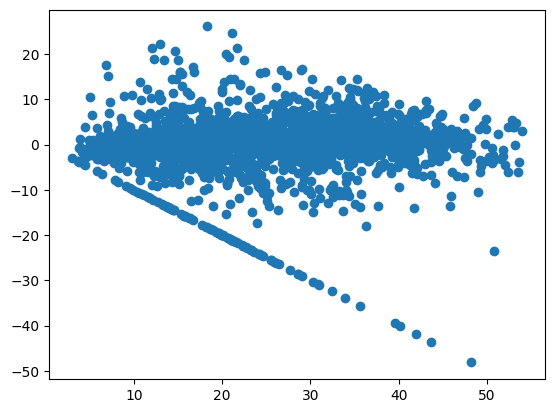

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_f),(y_test)-(y_pred_f))

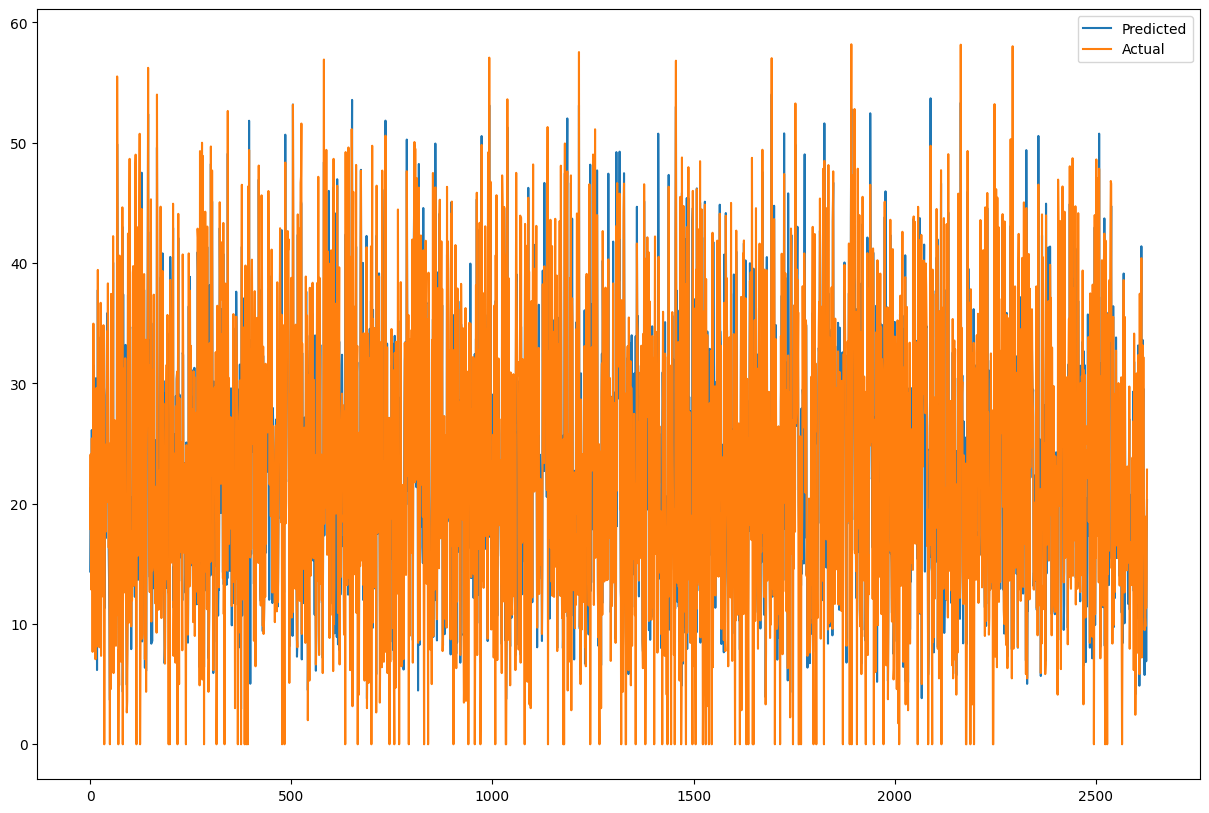

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((np.array(y_pred_f)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

**The r2_score for the test set is 0.77. This means our linear model is performing well on the data.**

In [ ]:

#importing XGBoost Regressor
from xgboost import   XGBRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
xgb_model =  XGBRegressor()

xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
from sklearn.preprocessing import PowerTransformer,MinMaxScaler

In [ ]:
#creating param dict for gridsearch
params = {'learning_rate':[0.5,1,1.5,2],'n_estimators':[80,100,150],'max_depth':[15,20,30]}


In [ ]:
# Grid search
xgb_grid = GridSearchCV(estimator=xgb_model,
                       param_grid = params,
                       cv = 5, verbose=2, scoring='roc_auc')

xgb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ...learning_rate=0.5, max_depth=15, n_estimators=80; total time=   1.1s
[CV] END ...learning_rate=0.5, max_depth=15, n_estimators=80; total time=   1.1s
[CV] END ...learning_rate=0.5, max_depth=15, n_estimators=80; total time=   1.0s
[CV] END ...learning_rate=0.5, max_depth=15, n_estimators=80; total time=   1.1s
[CV] END ...learning_rate=0.5, max_depth=15, n_estimators=80; total time=   1.1s
[CV] END ..learning_rate=0.5, max_depth=15, n_estimators=100; total time=   4.9s
[CV] END ..learning_rate=0.5, max_depth=15, n_estimators=100; total time=   1.1s
[CV] END ..learning_rate=0.5, max_depth=15, n_estimators=100; total time=   1.1s
[CV] END ..learning_rate=0.5, max_depth=15, n_estimators=100; total time=   1.1s
[CV] END ..learning_rate=0.5, max_depth=15, n_estimators=100; total time=   1.1s
[CV] END ..learning_rate=0.5, max_depth=15, n_estimators=150; total time=   1.1s
[CV] END ..learning_rate=0.5, max_depth=15, n_e

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'learning_rate': [0.5, 1, 1.5, 2],
                         'max_depth': [15, 20, 30],
                         'n_estimators': [80, 100, 150]},
             scoring='roc_auc', verbose=2)

In [ ]:
xgb_grid.best_params_

{'learning_rate': 0.5, 'max_depth': 15, 'n_estimators': 80}

In [ ]:
xgb_model_optimal = XGBRegressor(max_depth = 15,learning_rate= 0.5,  n_estimators = 80)
xgb_model_optimal.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=80, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:

train_class_preds = xgb_model_optimal.predict(X_train)
test_class_preds = xgb_model_optimal.predict(X_test)

In [ ]:
len(train_class_preds)

6132

In [ ]:
test_class_preds

array([15.299979, 20.525476, 20.791168, ..., 10.470635, 16.516132,
       18.077366], dtype=float32)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",xgb_model.score(X_train,y_train))

Model Score: 0.9733125882946306


In [ ]:
y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
MSE  = mean_squared_error((y_test), (y_pred_xgb))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_xgb))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_xgb)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 25.551970257578574
RMSE : 5.054895672274411
R2 : 0.8336439538250664
Adjusted R2 :  0.8328166284232783


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

**for best positive impact I choose the r2 metrics of XGBoost because it has the best r2 score on all of above and also the best model score**

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

**.After performing the various models the Random Forest and XGBoost found to be the best model that can be used for the Bike Sharing Demand Prediction since the performance metrics (mse,rmse) shows lower and (r2,adjusted_r2) shows a higher value for the Random Forest and XGBoost models.**

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
# Using random forest
rf_model.feature_importances_

array([0.2429922 , 0.30820422, 0.1013414 , 0.03300179, 0.02990185,
       0.05764638, 0.06797969, 0.00111506, 0.06262483, 0.01120888,
       0.04767394, 0.03532175, 0.00098803])

In [ ]:
importances = rf_model.feature_importances_

In [ ]:
importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
1           Temperature(°C)                0.31
0                      Hour                0.24
2               Humidity(%)                0.10
6              Rainfall(mm)                0.07
5   Solar Radiation (MJ/m2)                0.06
8                   Seasons                0.06
10                      Day                0.05
11                    Month                0.04
3          Wind speed (m/s)                0.03
4          Visibility (10m)                0.03
9                   Holiday                0.01
7             Snowfall (cm)                0.00
12                     Year                0.00

In [ ]:
#FIT THE MODEL
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

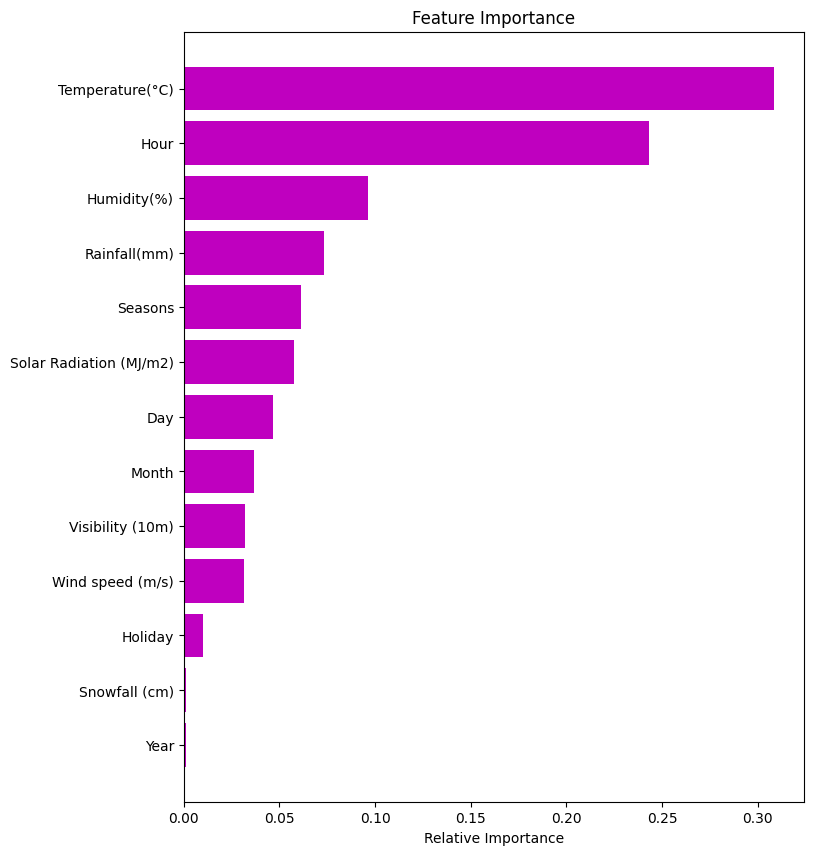

In [ ]:
#Plot the figure
plt.figure(figsize=(8,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='m', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File 
import pickle

In [ ]:
pickle.dump(rf_model,open('rf_save','wb'))

In [ ]:
model=pickle.load(open('rf_save','rb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.


In [ ]:
model.predict(X_train)

array([30.18308571, 23.17638544, 28.97460235, ..., 32.70213835,
       19.4964812 , 21.70696343])

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

# Final Conclusion:

**1.In holiday or non-working days there is demands in rented bikes.**

**2.There is a surge of high demand in the morning 8AM and in evening 6PM as the people might be going to their work at morning 8AM and returing from their work at the evening 6PM.**

**3.People prefered more rented bikes in the morning than the evening.**

**4.When the rainfall was less, people have booked more bikes except some few cases.**

**7.The Temperature, Hour & Humidity are the most important features that positively drive the total rented bikes count.**

**8.After performing the various models the Random Forest and XGBoost found to be the best model that can be used for the Bike Sharing Demand Prediction since the performance metrics (mse,rmse) shows lower and (r2,adjusted_r2) shows a higher value for the Random Forest and XGBoost models !**


**9.We can use either Random Forest or XGBoost model for the bike rental stations.**

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***